In [261]:
# importing tabular data and matrices handlers
import numpy as np
import pandas as pd

# importing modeling helpers
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV, cross_val_score

# importing preprocessing helpers
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import xgboost as xgb

# importing evaluating metrics
from sklearn.metrics import mean_squared_error, r2_score

# importing time keeper
import time

# importing pipelining helpers
from sklearn.pipeline import Pipeline

# importing visualization packages
import matplotlib as mpl
import plotly.express as px
from matplotlib import pyplot as plt
import seaborn as sns

# configuring visualizations
%matplotlib inline
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)
params = {
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [15, 15]
}
plt.rcParams.update(params)


# ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [262]:
def draw_pie(list_of_col):
    for col in list_of_col:
        stage = df[col].value_counts()
        values = stage.values
        index = stage.index
        fig = px.pie(values=values, names=index, title=f'Pie chart of {col}')
        fig.show()

def draw_multiple_boxplots(cols) :
    for col in cols :
        plt.figure(figsize = (7,4))
        sns.boxplot(y = col , data = df)
        plt.title(f'Box Plot of {col}')
        plt.ylabel(col)
        plt.show()

def swarmplot(y_col) :
    plt.figure(figsize=(10, 6))
    sns.swarmplot(x= 'price_range' , y= y_col , data=df)
    plt.title(f'{y_col} vs. Price Range')
    plt.xlabel('Price Range')
    plt.ylabel(f'{y_col}')
    plt.show()

def stripplot(y_col) : 
    plt.figure(figsize=(10, 6))
    sns.stripplot(x = 'price_range' , y = y_col , data = df)
    plt.title(f'{y_col} vs. Price Range')
    plt.xlabel('price range')
    plt.ylabel(f'{y_col}')
    plt.show()

def scatterplot (x_col , y_col) :
    sns.scatterplot(x = x_col , y = y_col , hue = 'price_range' , data = df)
    plt.title(f'{y_col} vs. {x_col} by Price Range')
    plt.xlabel(f'{x_col}')
    plt.ylabel(f'{y_col}')
    plt.legend(title='Price Range')
    plt.show()


def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2, 3])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

In [263]:
df = pd.read_csv('train - train.csv')
# df_test = pd.read_csv('test - test.csv')
df.head()

battery_power  blue  clock_speed  dual_sim    fc  four_g  int_memory  \
0            842     0          2.2         0   1.0     0.0         7.0   
1           1021     1          0.5         1   0.0     1.0        53.0   
2            563     1          0.5         1   2.0     1.0        41.0   
3            615     1          2.5         0   0.0     0.0        10.0   
4           1821     1          1.2         0  13.0     1.0        44.0   

   m_dep  mobile_wt  n_cores  ...  px_height  px_width     ram  sc_h  sc_w  \
0    0.6      188.0      2.0  ...       20.0     756.0  2549.0   9.0   7.0   
1    0.7      136.0      3.0  ...      905.0    1988.0  2631.0  17.0   3.0   
2    0.9      145.0      5.0  ...     1263.0    1716.0  2603.0  11.0   2.0   
3    0.8      131.0      6.0  ...     1216.0    1786.0  2769.0  16.0   8.0   
4    0.6      141.0      2.0  ...     1208.0    1212.0  1411.0   8.0   2.0   

   talk_time  three_g  touch_screen  wifi  price_range  
0         19        0             0     1            1  
1          7        1             1     0            2  
2          9        1             1     0            2  
3         11        1             0     0            2  
4         15        1             1     0            1  

[5 rows x 21 columns]

In [264]:
df.shape

(2000, 21)

In [265]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [267]:
df.duplicated().sum()

0

In [268]:
df.describe().T

count         mean          std    min      25%     50%  \
battery_power  2000.0  1238.518500   439.418206  501.0   851.75  1226.0   
blue           2000.0     0.495000     0.500100    0.0     0.00     0.0   
clock_speed    2000.0     1.522250     0.816004    0.5     0.70     1.5   
dual_sim       2000.0     0.509500     0.500035    0.0     0.00     1.0   
fc             1995.0     4.310276     4.335766    0.0     1.00     3.0   
four_g         1995.0     0.521303     0.499671    0.0     0.00     1.0   
int_memory     1995.0    32.048120    18.146476    2.0    16.00    32.0   
m_dep          1995.0     0.502256     0.288530    0.1     0.20     0.5   
mobile_wt      1996.0   140.266533    35.384676   80.0   109.00   141.0   
n_cores        1996.0     4.518036     2.288946    1.0     3.00     4.0   
pc             1995.0     9.915789     6.058469    0.0     5.00    10.0   
px_height      1996.0   644.651804   443.355443    0.0   282.00   564.0   
px_width       1998.0  1251.287788   432.352930  500.0   874.25  1247.0   
ram            1998.0  2124.262262  1085.273372  256.0  1206.50  2147.5   
sc_h           1999.0    12.303652     4.212373    5.0     9.00    12.0   
sc_w           1999.0     5.766383     4.357400    0.0     2.00     5.0   
talk_time      2000.0    11.011000     5.463955    2.0     6.00    11.0   
three_g        2000.0     0.761500     0.426273    0.0     1.00     1.0   
touch_screen   2000.0     0.503000     0.500116    0.0     0.00     1.0   
wifi           2000.0     0.507000     0.500076    0.0     0.00     1.0   
price_range    2000.0     1.500000     1.118314    0.0     0.75     1.5   

                   75%     max  
battery_power  1615.25  1998.0  
blue              1.00     1.0  
clock_speed       2.20     3.0  
dual_sim          1.00     1.0  
fc                7.00    19.0  
four_g            1.00     1.0  
int_memory       48.00    64.0  
m_dep             0.80     1.0  
mobile_wt       170.00   200.0  
n_cores           7.00     8.0  
pc               15.00    20.0  
px_height       947.25  1960.0  
px_width       1633.00  1998.0  
ram            3065.50  3998.0  
sc_h             16.00    19.0  
sc_w              9.00    18.0  
talk_time        16.00    20.0  
three_g           1.00     1.0  
touch_screen      1.00     1.0  
wifi              1.00     1.0  
price_range       2.25     3.0

In [269]:
# Check from fc column
# We use four_g to make sure the divies is modren 
df[(df['fc'] == 0) & (df['four_g'] == 1) & (df['price_range'] > 2)].head()

battery_power  blue  clock_speed  dual_sim   fc  four_g  int_memory  \
33           1310     1          2.2         1  0.0     1.0        51.0   
52           1654     1          1.5         1  0.0     1.0        43.0   
57            987     0          1.3         1  0.0     1.0        61.0   
69           1166     0          1.5         1  0.0     1.0        43.0   
80           1589     1          0.6         1  0.0     1.0        58.0   

    m_dep  mobile_wt  n_cores  ...  px_height  px_width     ram  sc_h  sc_w  \
33    0.6      100.0      4.0  ...      178.0    1919.0  3845.0   7.0   0.0   
52    0.3      109.0      2.0  ...      546.0     629.0  3112.0  12.0   5.0   
57    0.4      107.0      3.0  ...      581.0     820.0  3963.0   9.0   4.0   
69    0.8       80.0      4.0  ...      205.0     603.0  3993.0   7.0   1.0   
80    0.9       85.0      7.0  ...      319.0    1206.0  3464.0  19.0  10.0   

    talk_time  three_g  touch_screen  wifi  price_range  
33         12        1             1     0            3  
52         10        1             1     0            3  
57         20        1             0     1            3  
69          7        1             1     0            3  
80          6        1             1     1            3  

[5 rows x 21 columns]

In [270]:
# Check from touch_screen column
# We use four_g column to make sure that the divies is modren 
df[(df['touch_screen'] == 0) & (df['price_range'] >2) & (df['four_g'] == 1)]

battery_power  blue  clock_speed  dual_sim    fc  four_g  int_memory  \
6              1821     0          1.7         0   4.0     1.0        10.0   
16              838     0          0.5         0   1.0     1.0        13.0   
26              519     1          1.6         1   7.0     1.0        51.0   
57              987     0          1.3         1   0.0     1.0        61.0   
78             1199     1          2.5         1  15.0     1.0        16.0   
...             ...   ...          ...       ...   ...     ...         ...   
1868           1766     1          0.5         1   1.0     1.0        22.0   
1889           1090     1          2.3         0   1.0     1.0         8.0   
1904           1494     0          1.6         0   3.0     1.0        45.0   
1930            732     1          1.3         0   5.0     1.0        32.0   
1955           1515     1          2.1         1   4.0     1.0        24.0   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width     ram  sc_h  sc_w  \
6       0.8      139.0      8.0  ...      381.0    1018.0  3220.0  13.0   8.0   
16      0.1      196.0      8.0  ...      984.0    1850.0  3554.0  10.0   9.0   
26      0.3      132.0      4.0  ...      550.0     645.0  3763.0  16.0   1.0   
57      0.4      107.0      3.0  ...      581.0     820.0  3963.0   9.0   4.0   
78      0.2      116.0      4.0  ...     1168.0    1552.0  3448.0  17.0  13.0   
...     ...        ...      ...  ...        ...       ...     ...   ...   ...   
1868    0.8      122.0      8.0  ...      291.0    1318.0  3297.0   7.0   5.0   
1889    0.6      128.0      8.0  ...     1217.0    1670.0  3839.0  17.0   3.0   
1904    0.8      158.0      5.0  ...      449.0     790.0  3208.0  11.0   9.0   
1930    0.4      163.0      8.0  ...     1661.0    1836.0  3883.0  12.0   2.0   
1955    0.9      176.0      5.0  ...      747.0    1247.0  3104.0   6.0   5.0   

      talk_time  three_g  touch_screen  wifi  price_range  
6            18        1             0     1            3  
16           19        1             0     1            3  
26            4        1             0     1            3  
57           20        1             0     1            3  
78           10        1             0     1            3  
...         ...      ...           ...   ...          ...  
1868         16        1             0     0            3  
1889         11        1             0     1            3  
1904          4        1             0     0            3  
1930          5        1             0     1            3  
1955         20        1             0     0            3  

[130 rows x 21 columns]

In [271]:
df[(df['pc'] == 0) & (df['price_range'] >2) & (df['four_g'] == 1)]

battery_power  blue  clock_speed  dual_sim   fc  four_g  int_memory  \
33             1310     1          2.2         1  0.0     1.0        51.0   
52             1654     1          1.5         1  0.0     1.0        43.0   
287            1563     0          2.4         0  0.0     1.0        24.0   
524             825     0          0.5         1  0.0     1.0        23.0   
714            1188     1          1.4         1  0.0     1.0         9.0   
945             832     0          1.1         0  0.0     1.0        46.0   
981            1046     1          2.8         1  0.0     1.0        58.0   
987            1688     0          2.5         0  0.0     1.0        21.0   
1111           1735     1          1.9         1  0.0     1.0        59.0   
1180           1479     1          1.8         1  0.0     1.0        24.0   
1316           1924     0          2.6         0  0.0     1.0        59.0   
1690           1606     1          0.5         1  0.0     1.0        33.0   
1697           1152     1          2.1         1  0.0     1.0        26.0   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width     ram  sc_h  sc_w  \
33      0.6      100.0      4.0  ...      178.0    1919.0  3845.0   7.0   0.0   
52      0.3      109.0      2.0  ...      546.0     629.0  3112.0  12.0   5.0   
287     0.2      170.0      8.0  ...      142.0    1699.0  3660.0   7.0   5.0   
524     0.1       86.0      2.0  ...      206.0    1917.0  3278.0   8.0   6.0   
714     0.6      114.0      2.0  ...     1339.0    1558.0  2896.0  12.0  11.0   
945     0.3       93.0      6.0  ...      820.0    1366.0  3317.0   8.0   0.0   
981     0.2      100.0      8.0  ...      259.0    1040.0  3863.0  17.0  12.0   
987     0.2      170.0      7.0  ...      650.0     864.0  3984.0  17.0  14.0   
1111    0.7      148.0      6.0  ...      137.0     846.0  3230.0   6.0   1.0   
1180    0.1      146.0      6.0  ...      327.0     645.0  3762.0  12.0  10.0   
1316    0.9      136.0      6.0  ...     1438.0    1923.0  3646.0  10.0   9.0   
1690    0.9      200.0      5.0  ...      157.0     770.0  3437.0  11.0   1.0   
1697    0.3       82.0      2.0  ...     1304.0    1673.0  3284.0  15.0   2.0   

      talk_time  three_g  touch_screen  wifi  price_range  
33           12        1             1     0            3  
52           10        1             1     0            3  
287           5        1             1     0            3  
524           2        1             0     1            3  
714          16        1             0     1            3  
945          19        1             1     0            3  
981           9        1             1     1            3  
987           8        1             1     1            3  
1111          9        1             1     0            3  
1180          5        1             0     0            3  
1316         16        1             0     1            3  
1690          2        1             0     0            3  
1697          8        1             0     1            3  

[13 rows x 21 columns]


### Inferences:

**Front Camera (fc):**
- **Count**: There are 1991 entries in the `fc` column.
- **Mean**: The average front camera megapixels is approximately 4.31.
- **Standard Deviation**: The standard deviation is 4.34, indicating a significant spread in the data.
- **Range**: The values range from 0.0 to 19.0 megapixels.
- **Quartiles**: 
  - 25th percentile (Q1): 1.0 megapixels
  - Median (Q2): 3.0 megapixels
  - 75th percentile (Q3): 7.0 megapixels
- **Outliers**: Devices with no front camera but having high cost and 4G support suggest potential outliers or inconsistencies in the data.

**Primary Camera (pc):**
- **Count**: There are 1991 entries in the `pc` column.
- **Mean**: The average primary camera megapixels is approximately 9.91.
- **Standard Deviation**: The standard deviation is 6.06, indicating a considerable spread in the data.
- **Range**: The values range from 0.0 to 20.0 megapixels.
- **Quartiles**: 
  - 25th percentile (Q1): 5.0 megapixels
  - Median (Q2): 10.0 megapixels
  - 75th percentile (Q3): 15.0 megapixels
- **Outliers**: Similar to the front camera, the presence of devices with 0.0 primary camera megapixels that are high cost and have 4G support suggests potential outliers.

**Touch Screen (touch_screen):**
- **Count**: There are 1991 entries in the `touch_screen` column.
- **Mean**: The average value is approximately 0.50, indicating a nearly even split between devices with and without a touch screen.
- **Standard Deviation**: The standard deviation is 0.50.
- **Values**: The touch screen values are binary (0 or 1).
- **Quartiles**: 
  - 25th percentile (Q1): 0.0
  - Median (Q2): 1.0
  - 75th percentile (Q3): 1.0
- **Inconsistencies**: Devices with no touch screen but having high cost and 4G support suggest potential data inconsistencies or outliers.

**Price Range (price_range):**
- **Count**: There are 1991 entries in the `price_range` column.
- **Mean**: The average price range value is approximately 1.50.
- **Standard Deviation**: The standard deviation is 1.12, indicating a moderate spread in the data.
- **Range**: The values range from 0.0 to 3.0.
- **Quartiles**: 
  - 25th percentile (Q1): 0.0
  - Me
ve 4G support, reflecting diverse product features and prices.
- **Actionable Insights**: It's crucial to address the outliers and inconsistencies in the dataset to ensure accurate analysis and interpretation. This might involve investigating data entry errors, filtering out outliers, or implementing more robust data validation processes.

In [272]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           5
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [273]:
# drop null values
df = df.dropna()

In [274]:
# last check from null values
df.isnull().sum().sum()

0

array([[<Axes: title={'center': 'battery_power'}>,
        <Axes: title={'center': 'blue'}>,
        <Axes: title={'center': 'clock_speed'}>,
        <Axes: title={'center': 'dual_sim'}>,
        <Axes: title={'center': 'fc'}>],
       [<Axes: title={'center': 'four_g'}>,
        <Axes: title={'center': 'int_memory'}>,
        <Axes: title={'center': 'm_dep'}>,
        <Axes: title={'center': 'mobile_wt'}>,
        <Axes: title={'center': 'n_cores'}>],
       [<Axes: title={'center': 'pc'}>,
        <Axes: title={'center': 'px_height'}>,
        <Axes: title={'center': 'px_width'}>,
        <Axes: title={'center': 'ram'}>,
        <Axes: title={'center': 'sc_h'}>],
       [<Axes: title={'center': 'sc_w'}>,
        <Axes: title={'center': 'talk_time'}>,
        <Axes: title={'center': 'three_g'}>,
        <Axes: title={'center': 'touch_screen'}>,
        <Axes: title={'center': 'wifi'}>],
       [<Axes: title={'center': 'price_range'}>, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >]], 

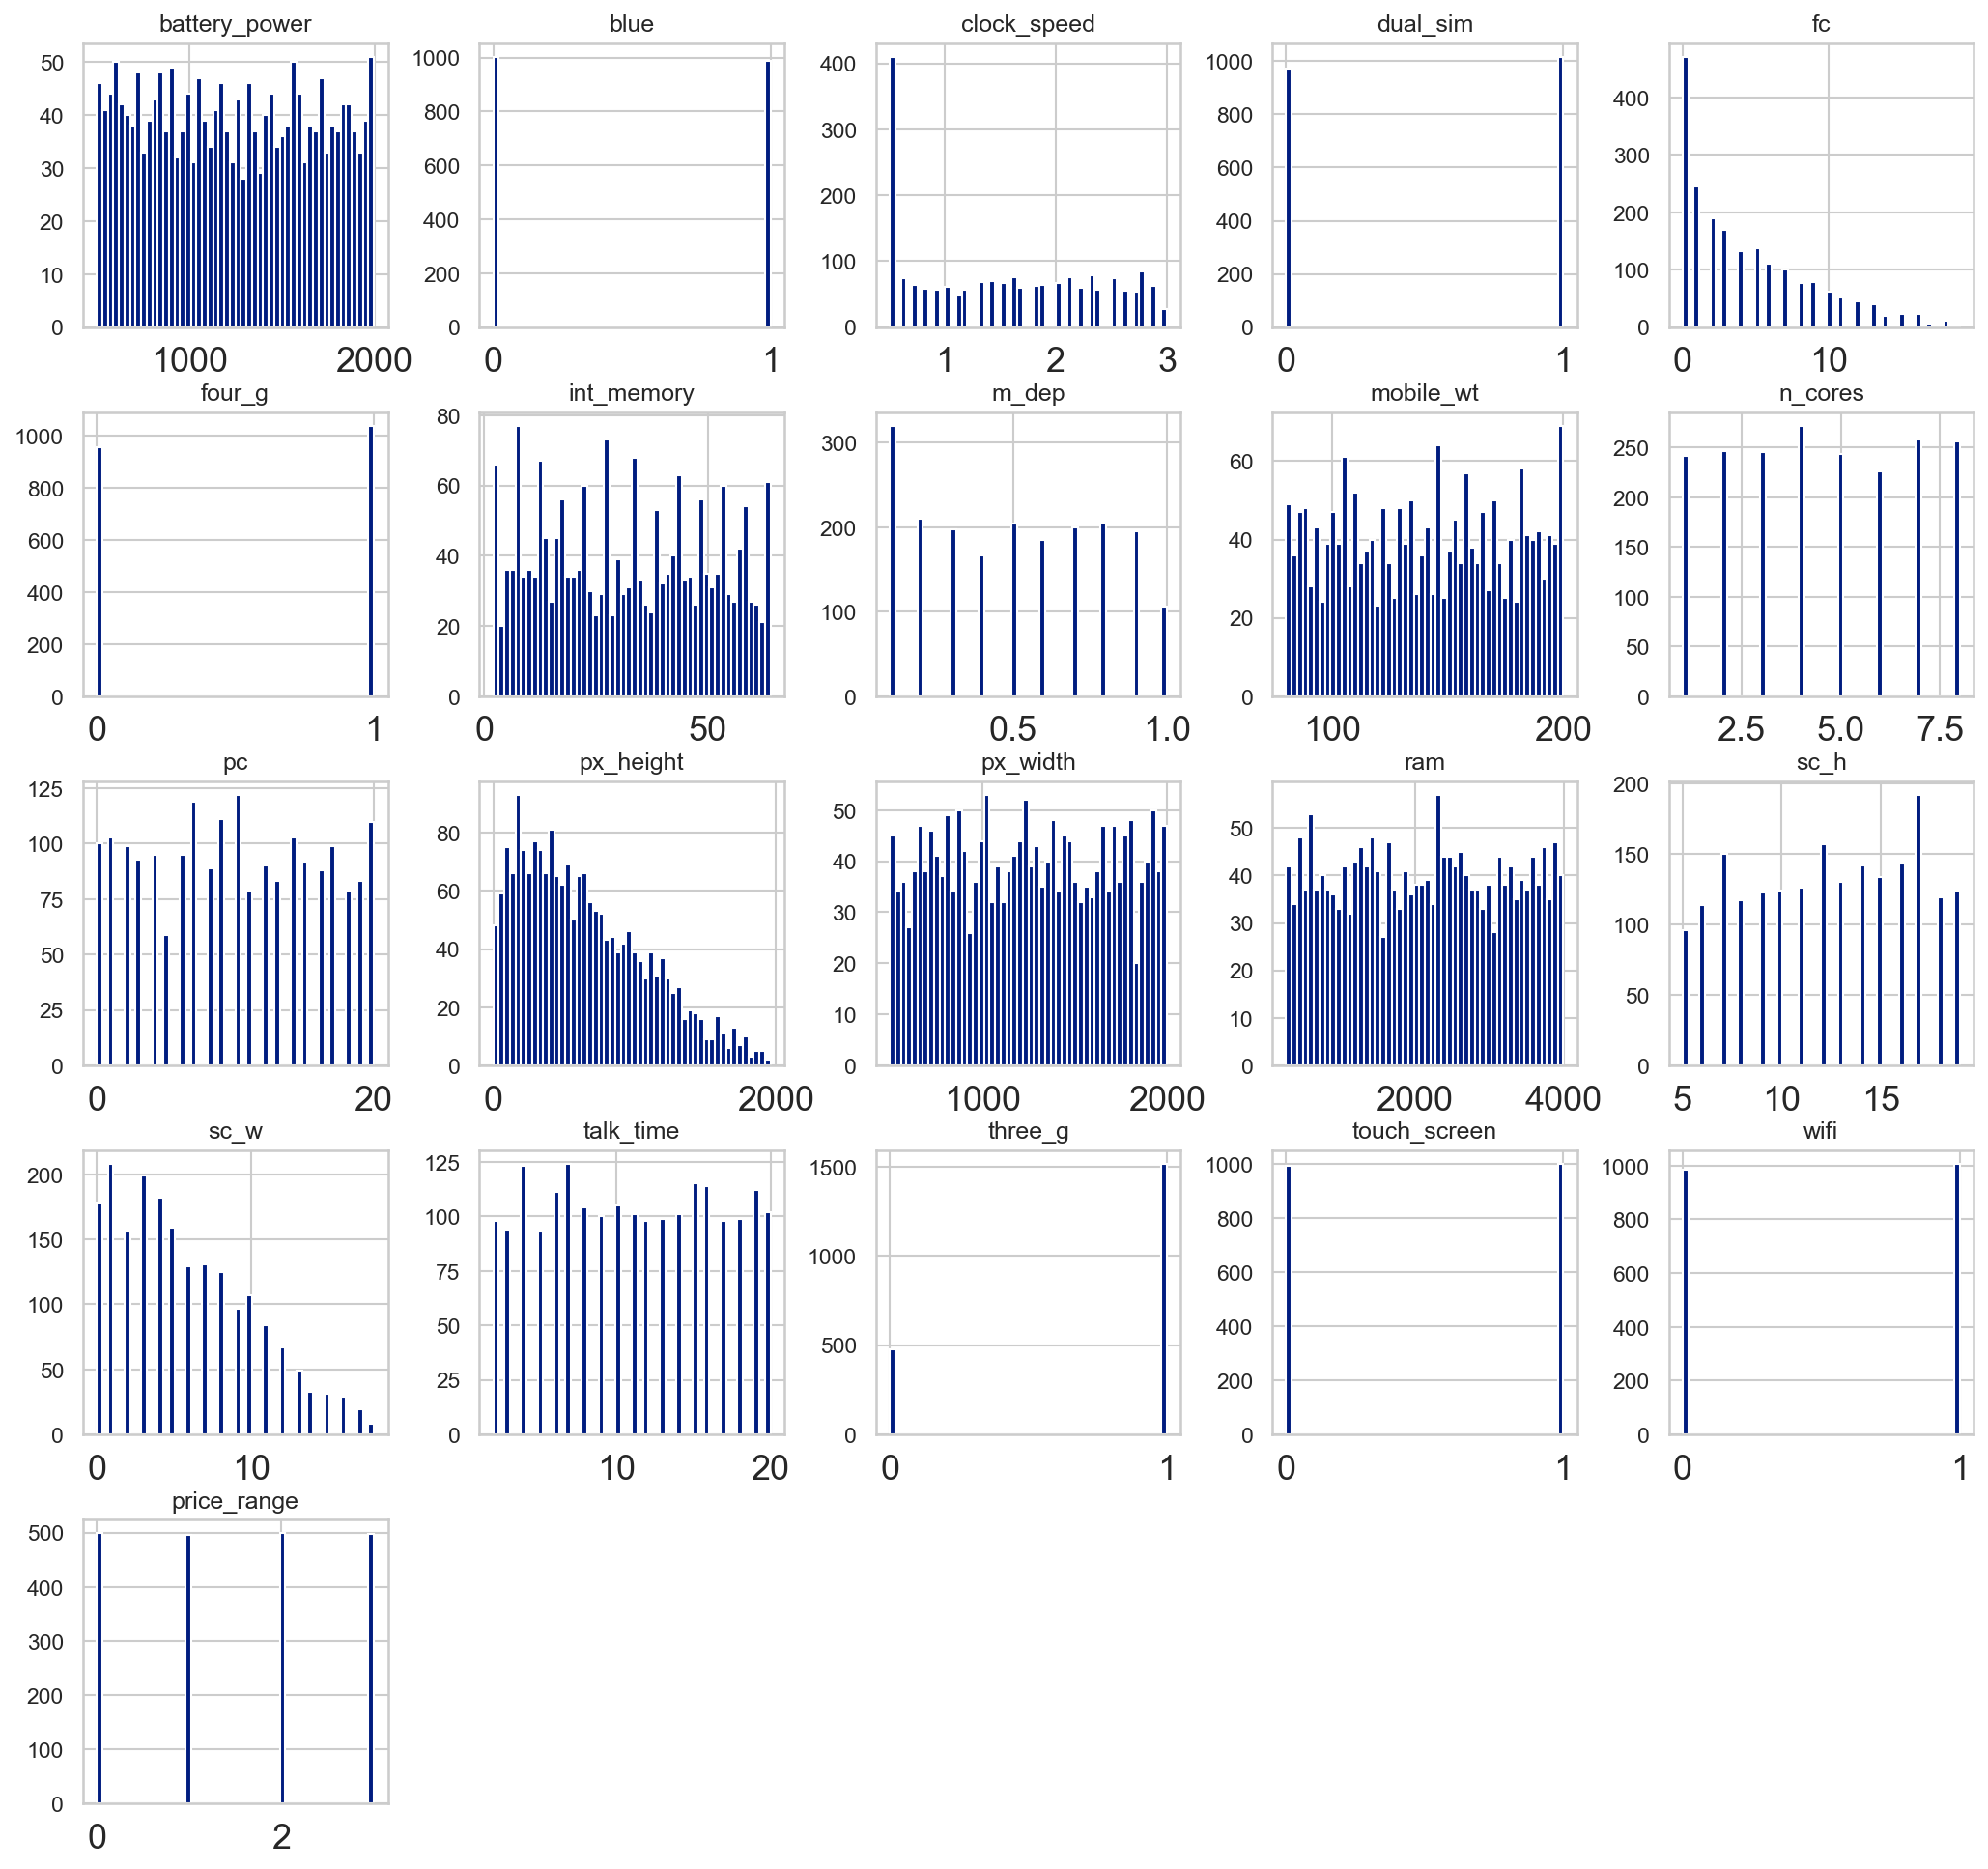

In [275]:
df.hist(bins = 50)

### Inferences from the Histogram Analysis:

y.1

**1. Clock Speed (clock_speed):**
- **Observation**: The majority of devices have a clock speed less than 0.5 GHz.
- **Inference**: Most devices in the dataset are likely to be low-power or older models with slower process2rs.

**2. Front Camera (fc):**
- **Observation**: There is a positive skew in the front camera data. As the value of `fc` (front camera megapixels) increases, the number of devices decreases.
- **Inference**: Fewer devices have high-megapixel front cameras, suggesting that high-resolution front cameras are less3common.

**3. 4G (four_g):**
- **Observation**: The number of devices with 4G is greater than the number of devices without 4G.
- **Inference**: This indicates a higher prevalence of 4G-capable devices in 4he dataset.

**4. Mobile Depth (m_dep):**
- **Observation**: The majority of devices have a mobile depth (m_dep) less than 0.5.
- **Inference**: Most devices are relatively slim, with fewer thick devices5in the dataset.

**5. Pixel Height (px_height):**
- **Observation**: There is a positive skew in the pixel height data.
- **Inference**: Fewer devices have a high pixel height, indicating that high-resolution scre6ns are less common.

**6. Screen Width (sc_w):**
- **Observation**: There is a positive skew in the screen width data.
- **Inference**: Most devices have smaller screen widths, with fewer devices h7ving very wide screens.

**7. 3G (three_g):**
- **Observation**: A large number of devices use 3G.
- **Inference**: Despite the presence of 4G, a substantial number of devices still rely on 3G technology, indicating a mix of older and newer modeevices lack Bluetooth than have it.


### Summary:
- **Bluetooth**: More devices lack Bluetooth than have it.
- **Clock Speed**: Most devices have a clock speed below 0.5 GHz, suggesting many low-power devices.
- **Front Camera**: There is a positive skew, with fewer devices having higher megapixel front cameras.
- **4G**: More devices support 4G than those that do not.
- **Mobile Depth**: Most devices are thin, with m_dep less than 0.5.
- **Pixel Height**: There is a positive skew, with fewer high pixel height devices.
- **Screen Width**: Positive skew indicates most devices have smaller screen widths.
- **3G**: A large number of devices support 3G, indicating a range of older devices in the dataset.


In [276]:
df.skew().sort_values(ascending=False)

fc               1.018337
px_height        0.662986
sc_w             0.633236
clock_speed      0.177621
m_dep            0.087387
int_memory       0.056349
battery_power    0.031851
pc               0.021024
px_width         0.015752
blue             0.015080
talk_time        0.013605
n_cores          0.007925
ram              0.006836
mobile_wt        0.003900
price_range     -0.000269
touch_screen    -0.007037
wifi            -0.021112
dual_sim        -0.043237
four_g          -0.083511
sc_h            -0.098481
three_g         -1.224428
dtype: float64

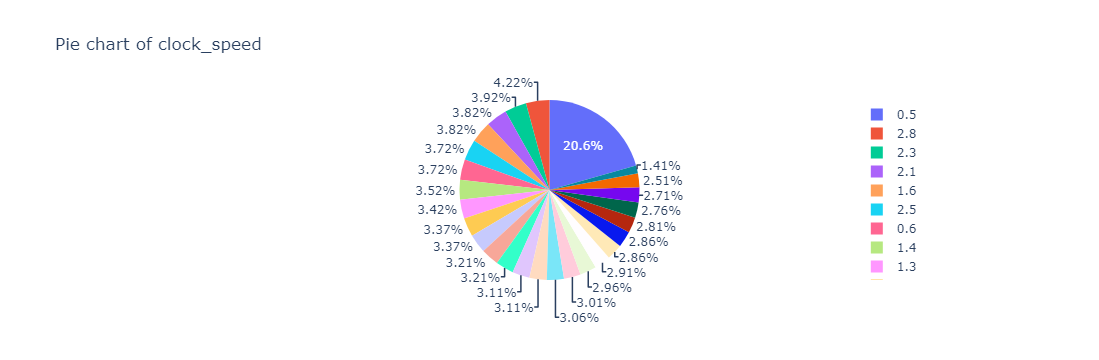

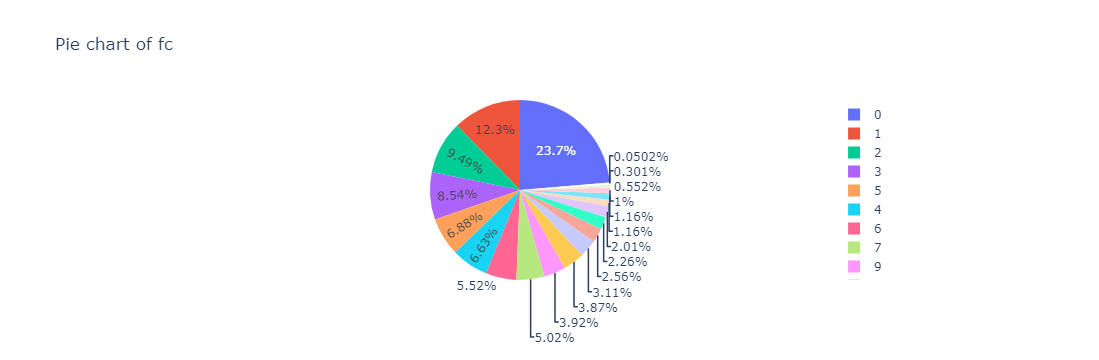

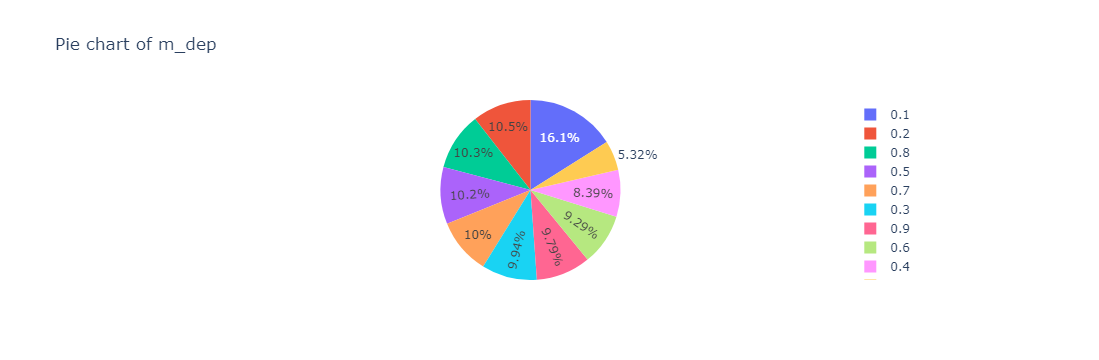

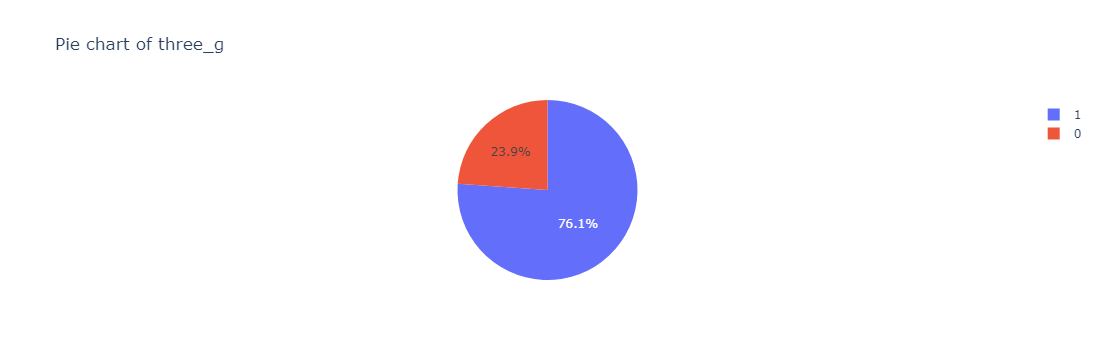

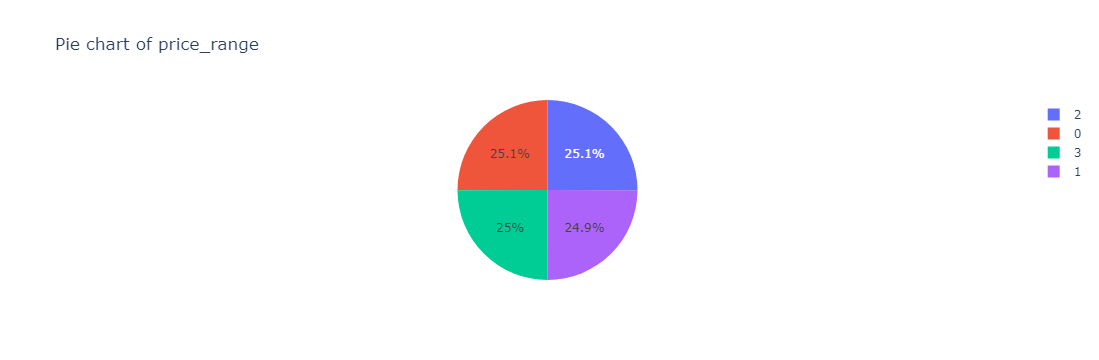

In [277]:
columns_to_draw = ['clock_speed' , 'fc' , 'm_dep' , 'three_g' , 'price_range']
draw_pie(columns_to_draw)

### Inferences Based on the Pie Charts:

**1. Clock Speed (`clock_speed`):**
- **Observation**: Approximately 20% of devices have a clock speed less than 0.5 Gces.

**2. Front Camera (`fc`):**
- **Observation**: 
  - 23% of devices do not have a front camera.
  - Approximately 50% of devices have a front camera with a resolution between 1 and 6 megare common.

**3. Mobile Depth (`m_dep`):**
- **Observation**: 26% of devices have a mobile depth (`m_dep`) rtable devices.

**4. Price Range (`price_range`):**
- **Observation**: The proportions are equal among the rious price points.

### Summary of Inferences:

1. **Clock Speed**:
   - A substantial 20% of devices have a low clock speed (< 0.5 GHz), reflecting a significant market for low-power or older devices.

2. **Front Camera (`fc`)**:
   - 23% of devices lack a front camera, suggesting a considerable segment of the market does not prioritize this feature.
   - Around 50% of devices have a front camera resolution between 1-6 megapixels, indicating mid-range camera specifications are common.

3. **Mobile Depth (`m_dep`)**:
   - 26% of devices are very slim with a depth less than 0.2, indicating a preference for thinner devices.

4. **Price Range (`price_range`)**:
   - The equal distribution across the four price ranges suggests a balanced market demaowing you to visually analyze the distribution of values in each column.

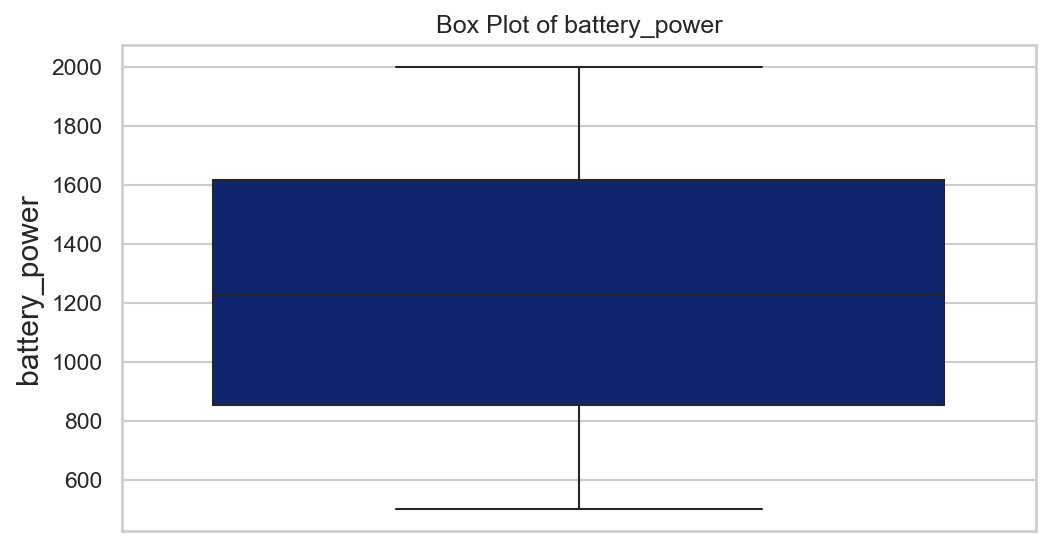

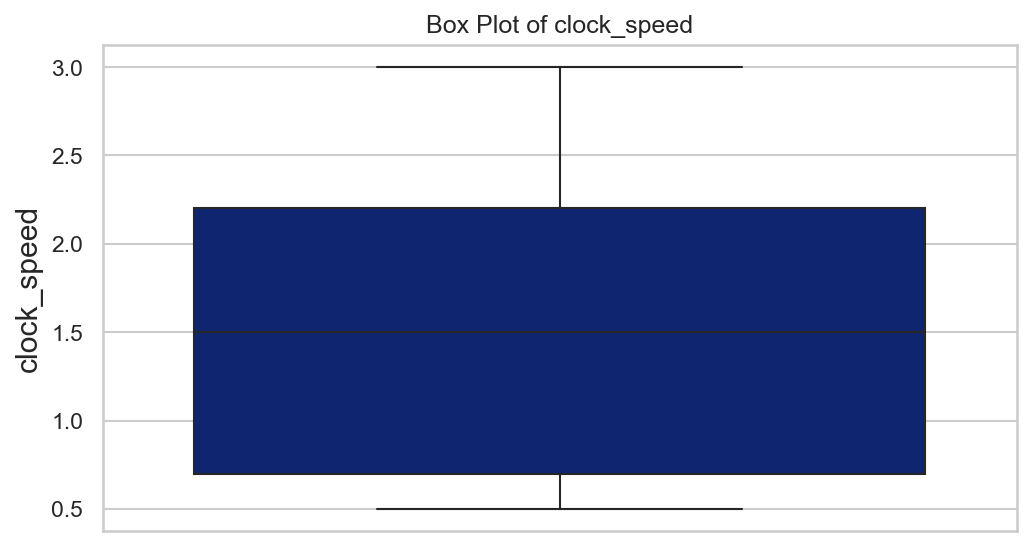

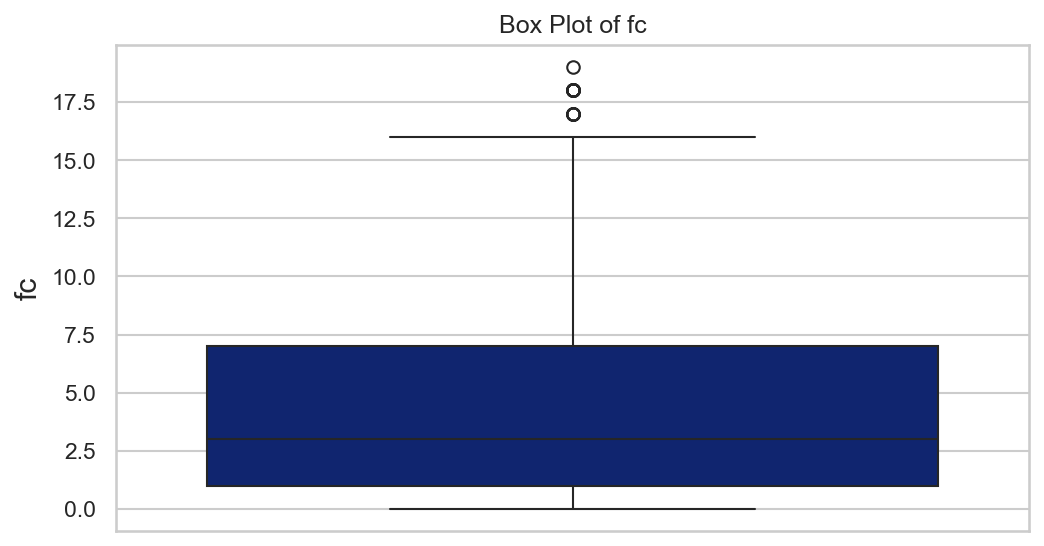

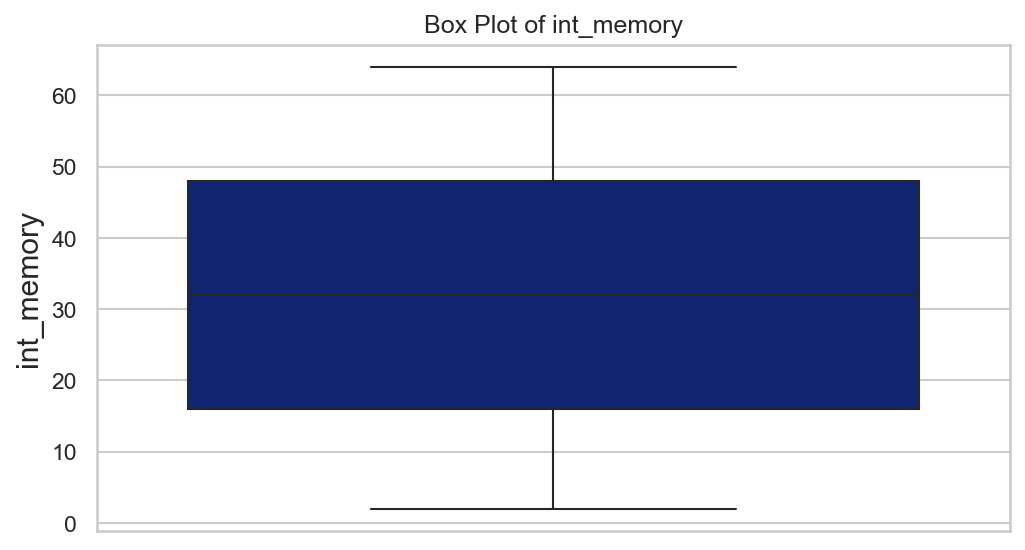

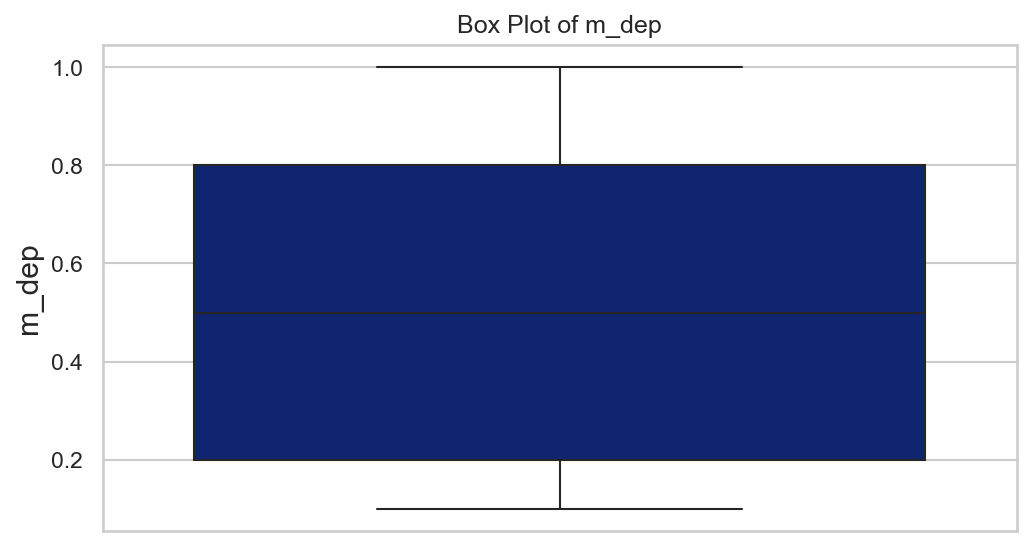

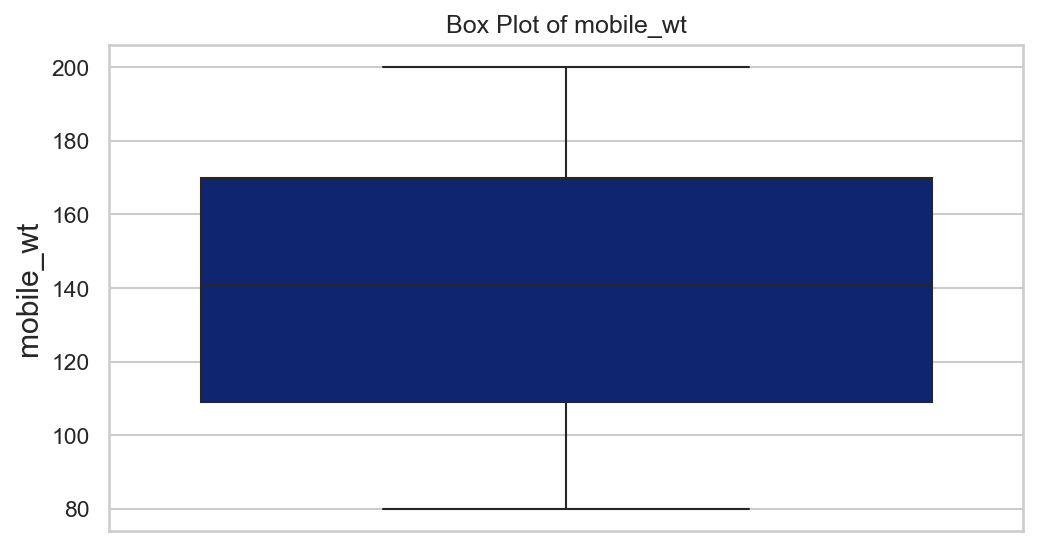

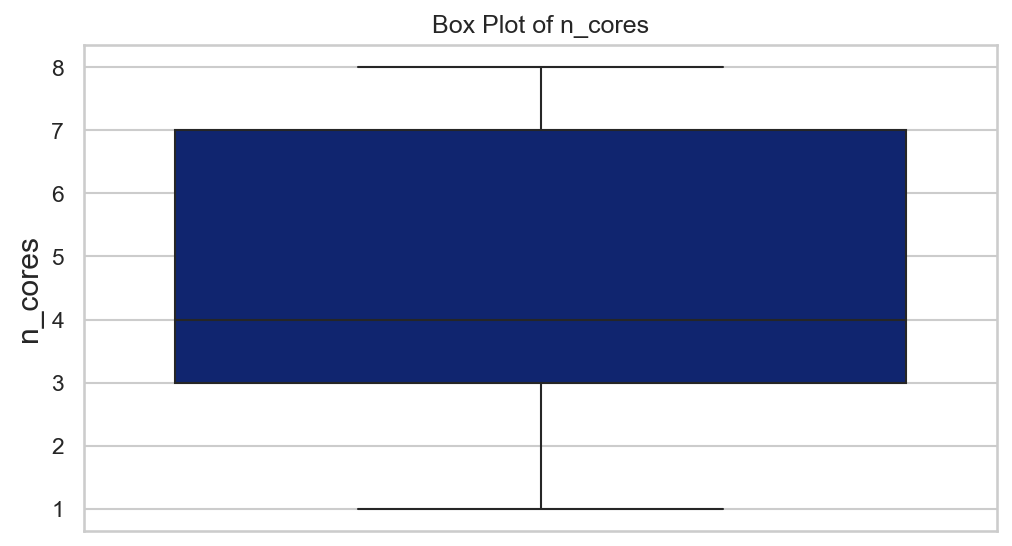

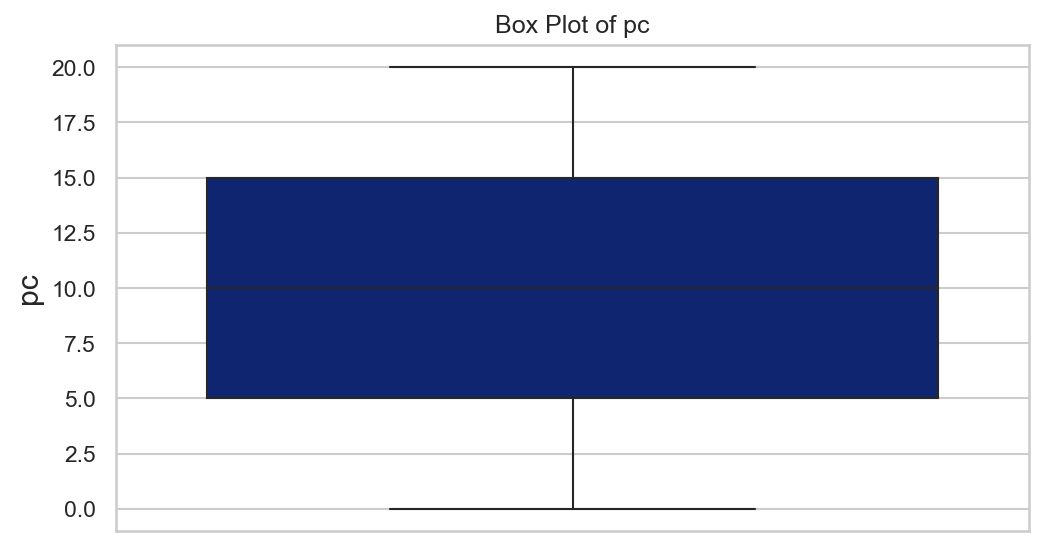

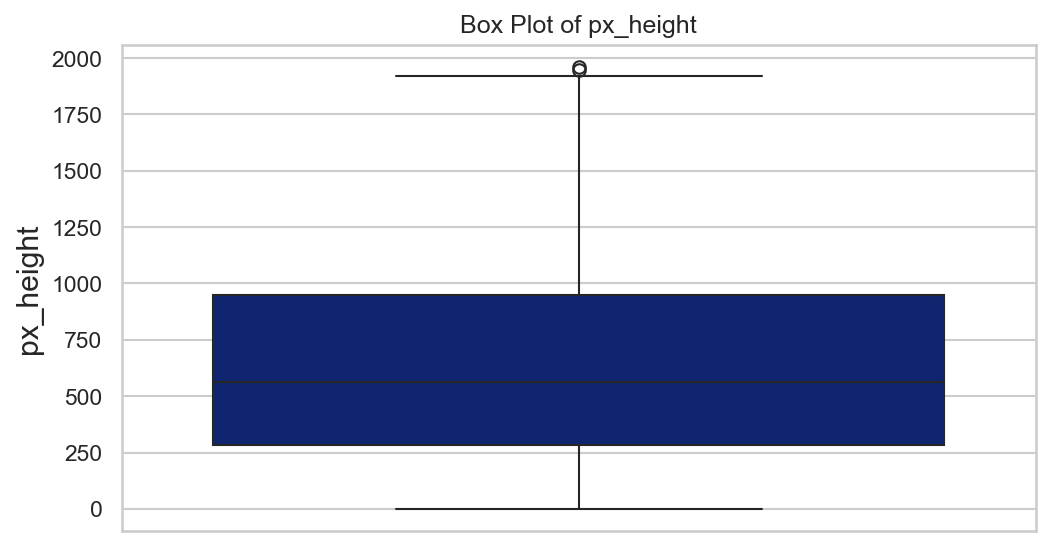

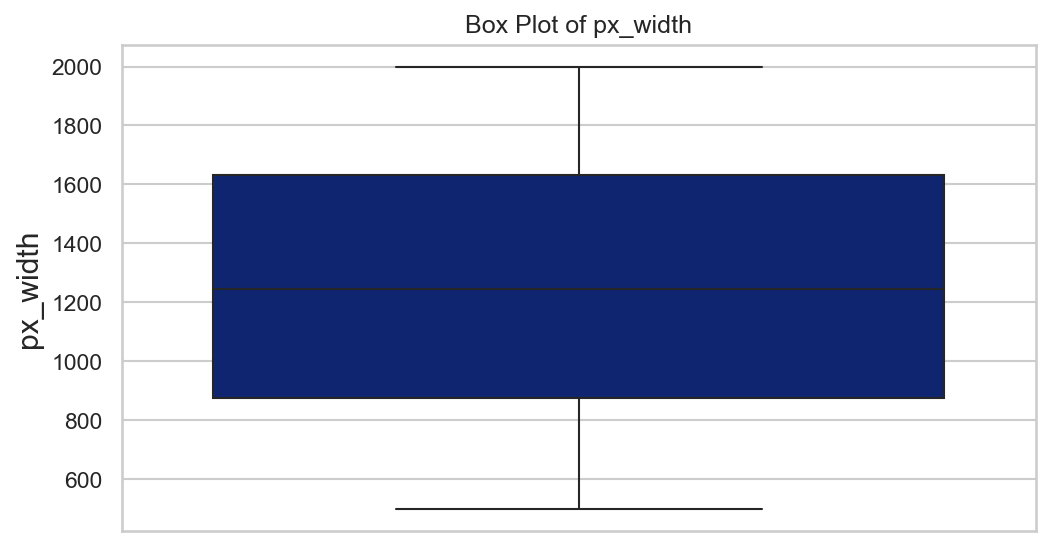

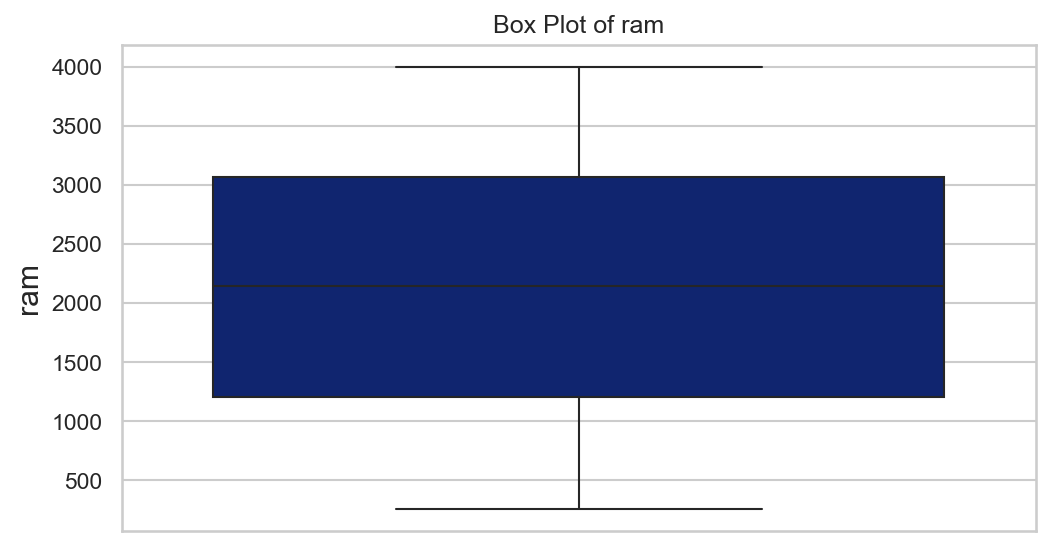

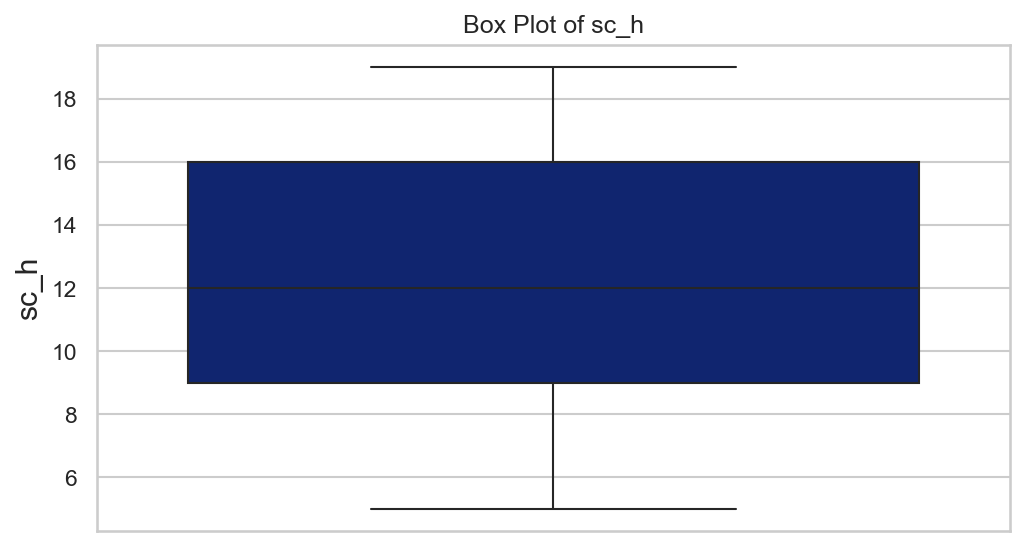

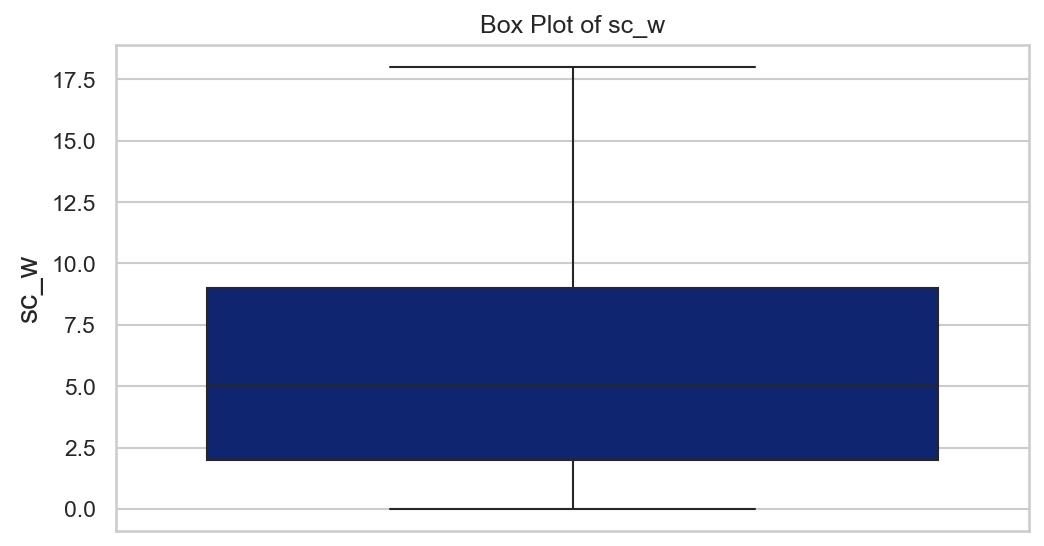

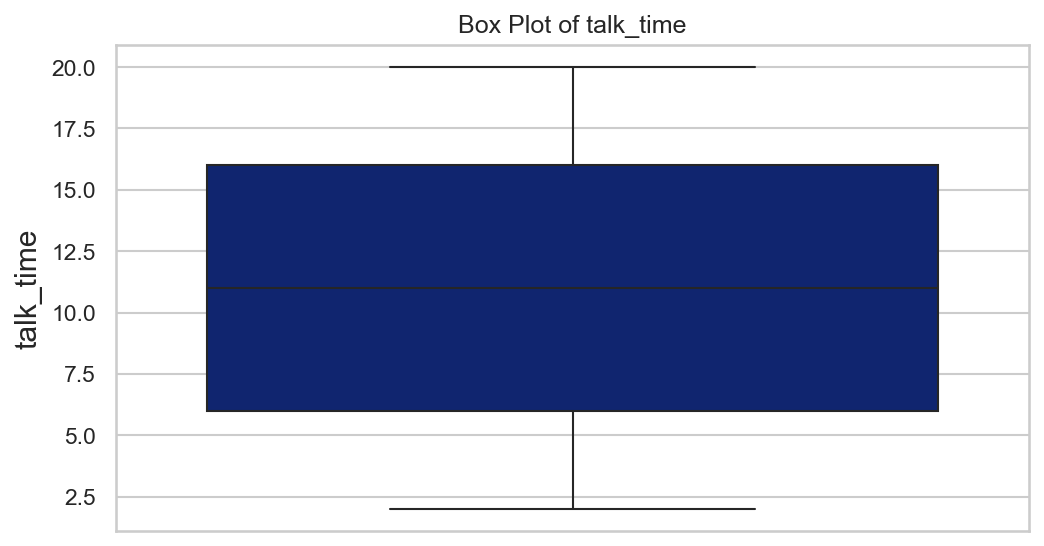

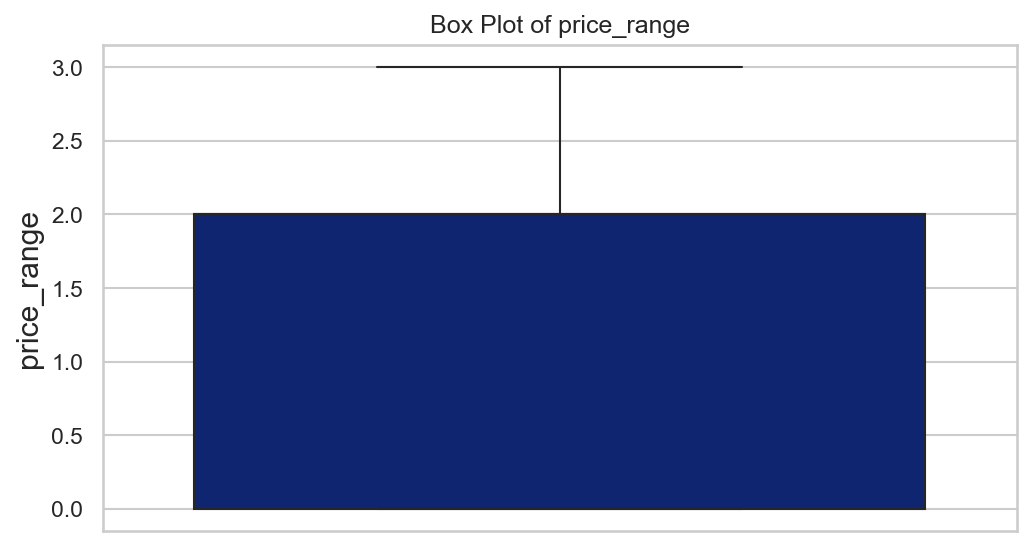

In [278]:
list_to_plot = ['battery_power' , 'clock_speed' , 'fc' , 'int_memory' , 'm_dep' , 'mobile_wt' , 'n_cores'
               , 'pc' , 'px_height' , 'px_width' , 'ram' , 'sc_h' , 'sc_w' , 'talk_time' , 'price_range']
draw_multiple_boxplots(list_to_plot)

### Inferences Based on the boxplots Charts:

**1. Front Camera (`fc`):**
- **Observation**: there is out outlier 

**2. Pixel Height (`px_height`):**
- **Observation**: there is out outlier  

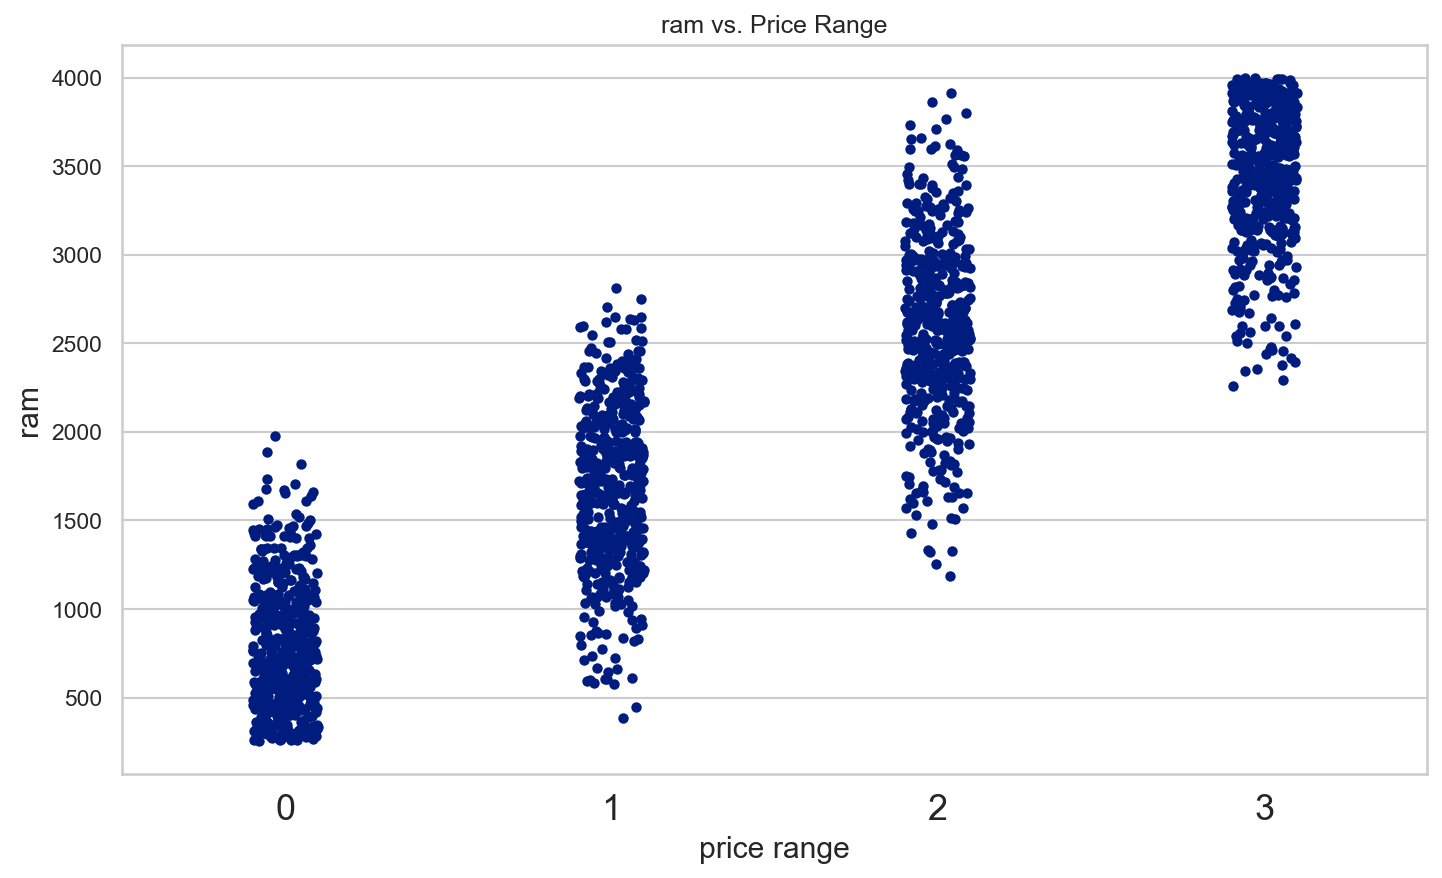

In [279]:
stripplot('ram')

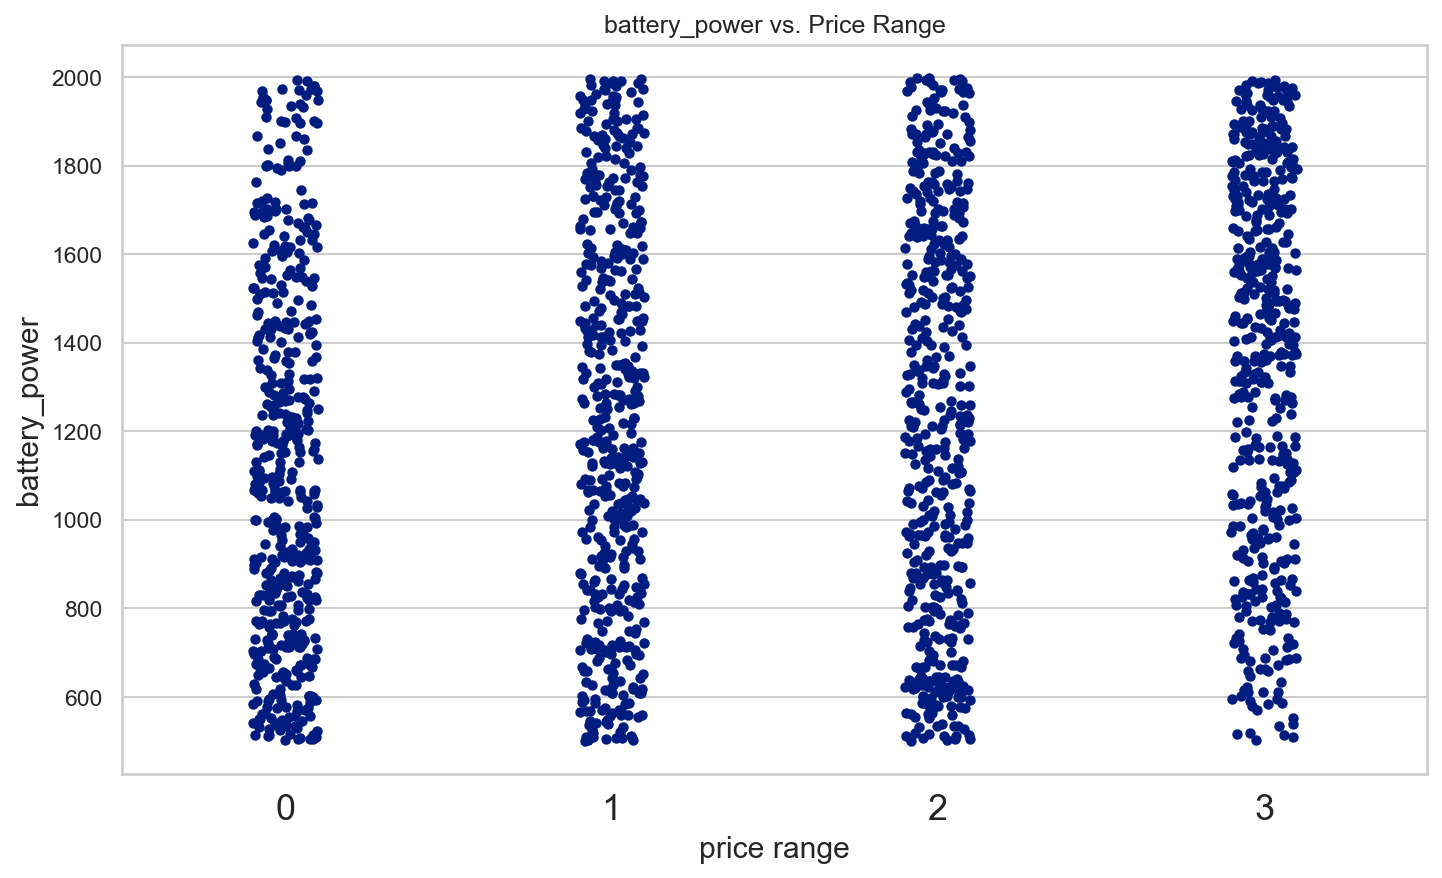

In [280]:
stripplot('battery_power')

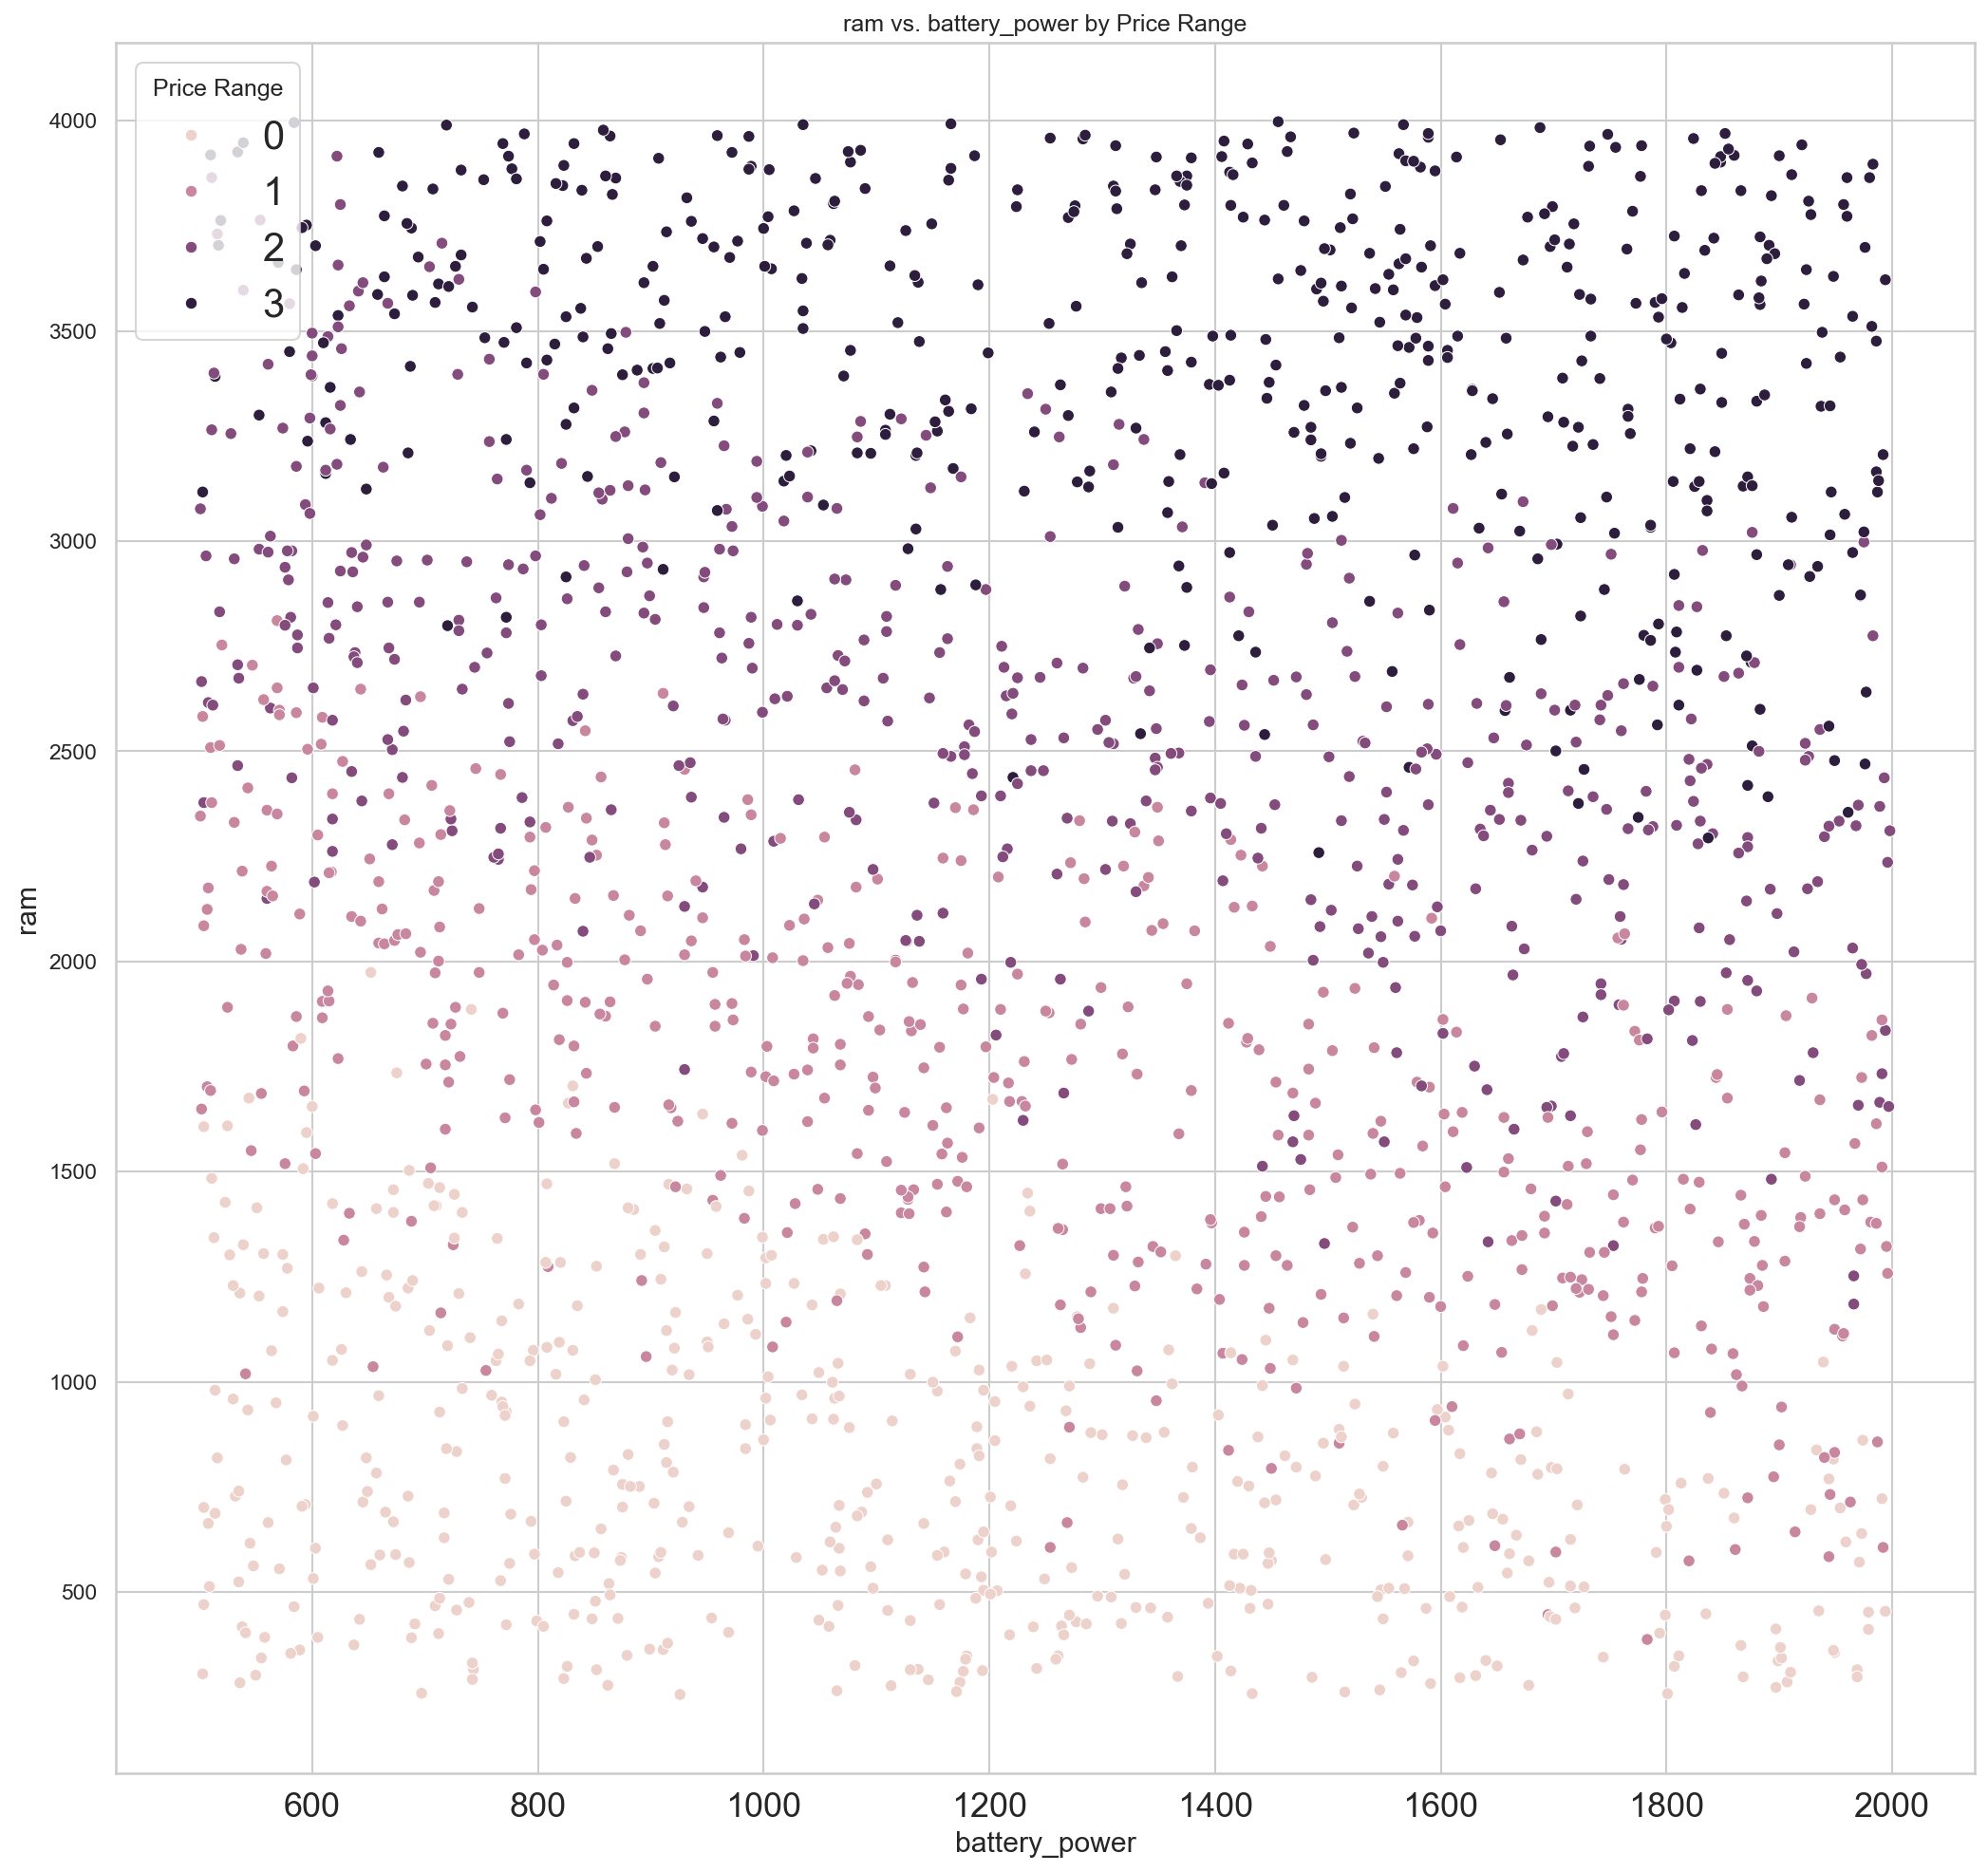

In [281]:
scatterplot('battery_power' , 'ram')

### Inferences:

#### Battery Power:
- The scatter plot shows that battery power does not have a clear and strong relationship with the price range. This suggests that battery capacity alone is not a significant determinant of the device's price.
- Despite varying battery capacities, devices across all price ranges show similar battery power levels, indicating that battery power is distributed relatively evenly across different price tiers.

#### RAM:
- There is a noticeable positive correlation between RAM and the price range. As the RAM increases, the price of the device also tends to increase.
- This positive trend indicates that RAM is a significant factor in determining the price of the device. Higher-priced devices typically come with more RAM, reflecting their enhanced performance capabilities and target market posi
- Outliers in RAM:
Upon examining the distribution of RAM values, it's evident that there are outliers present. 

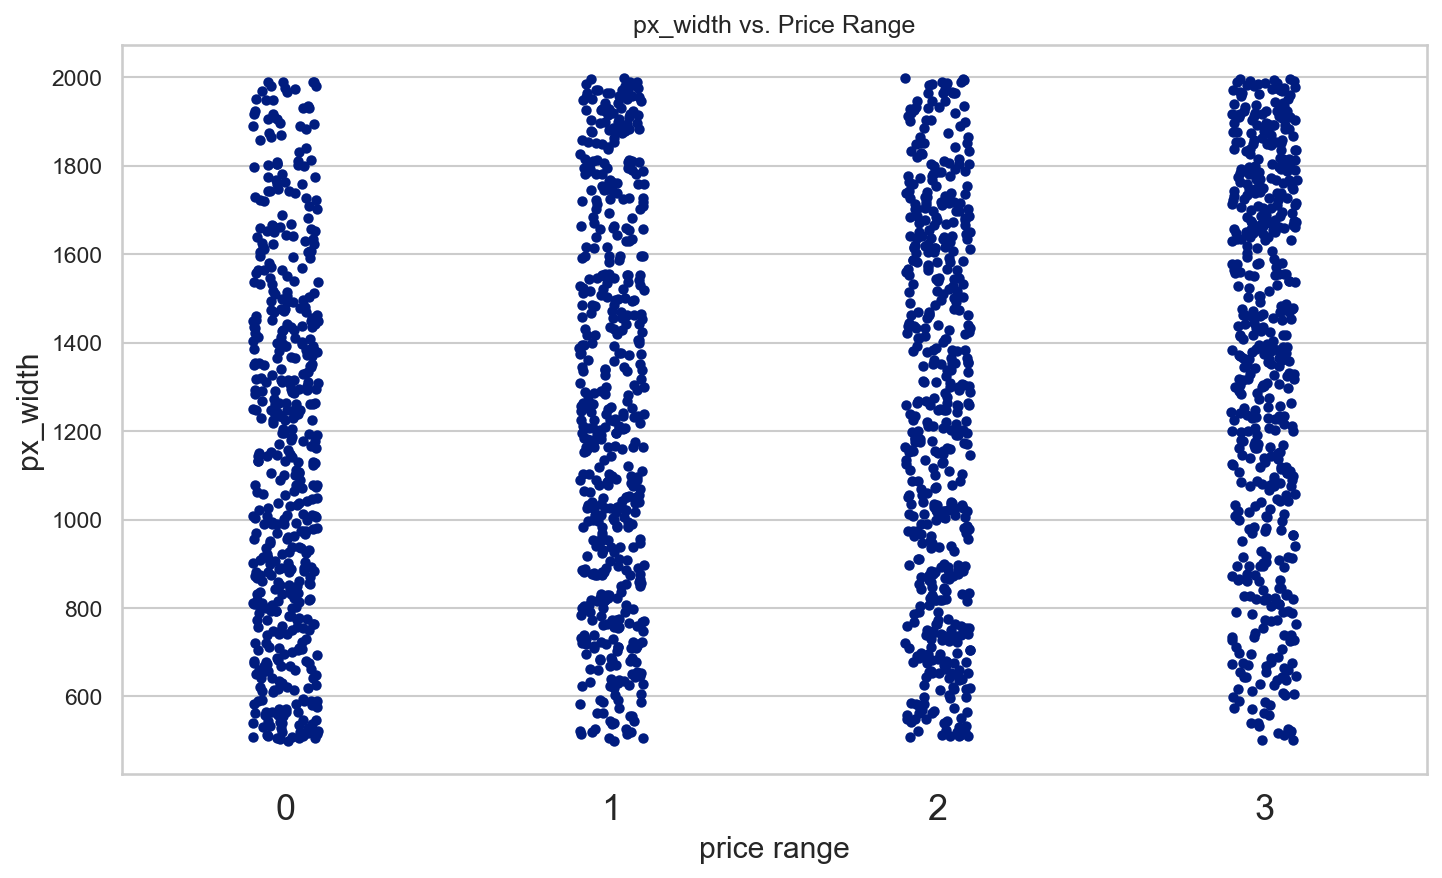

In [282]:
stripplot('px_width')

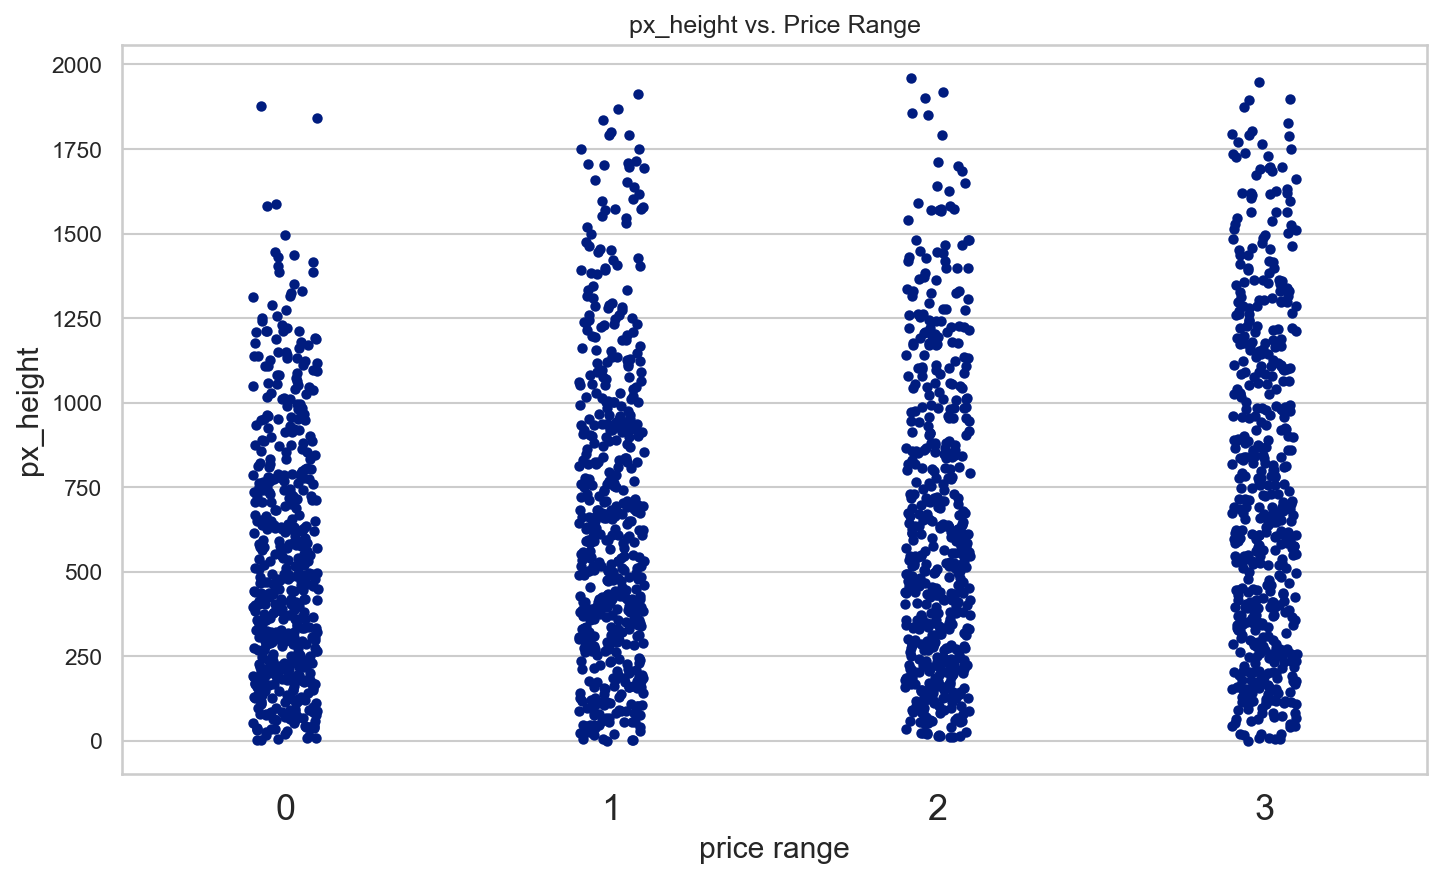

In [283]:
stripplot('px_height')

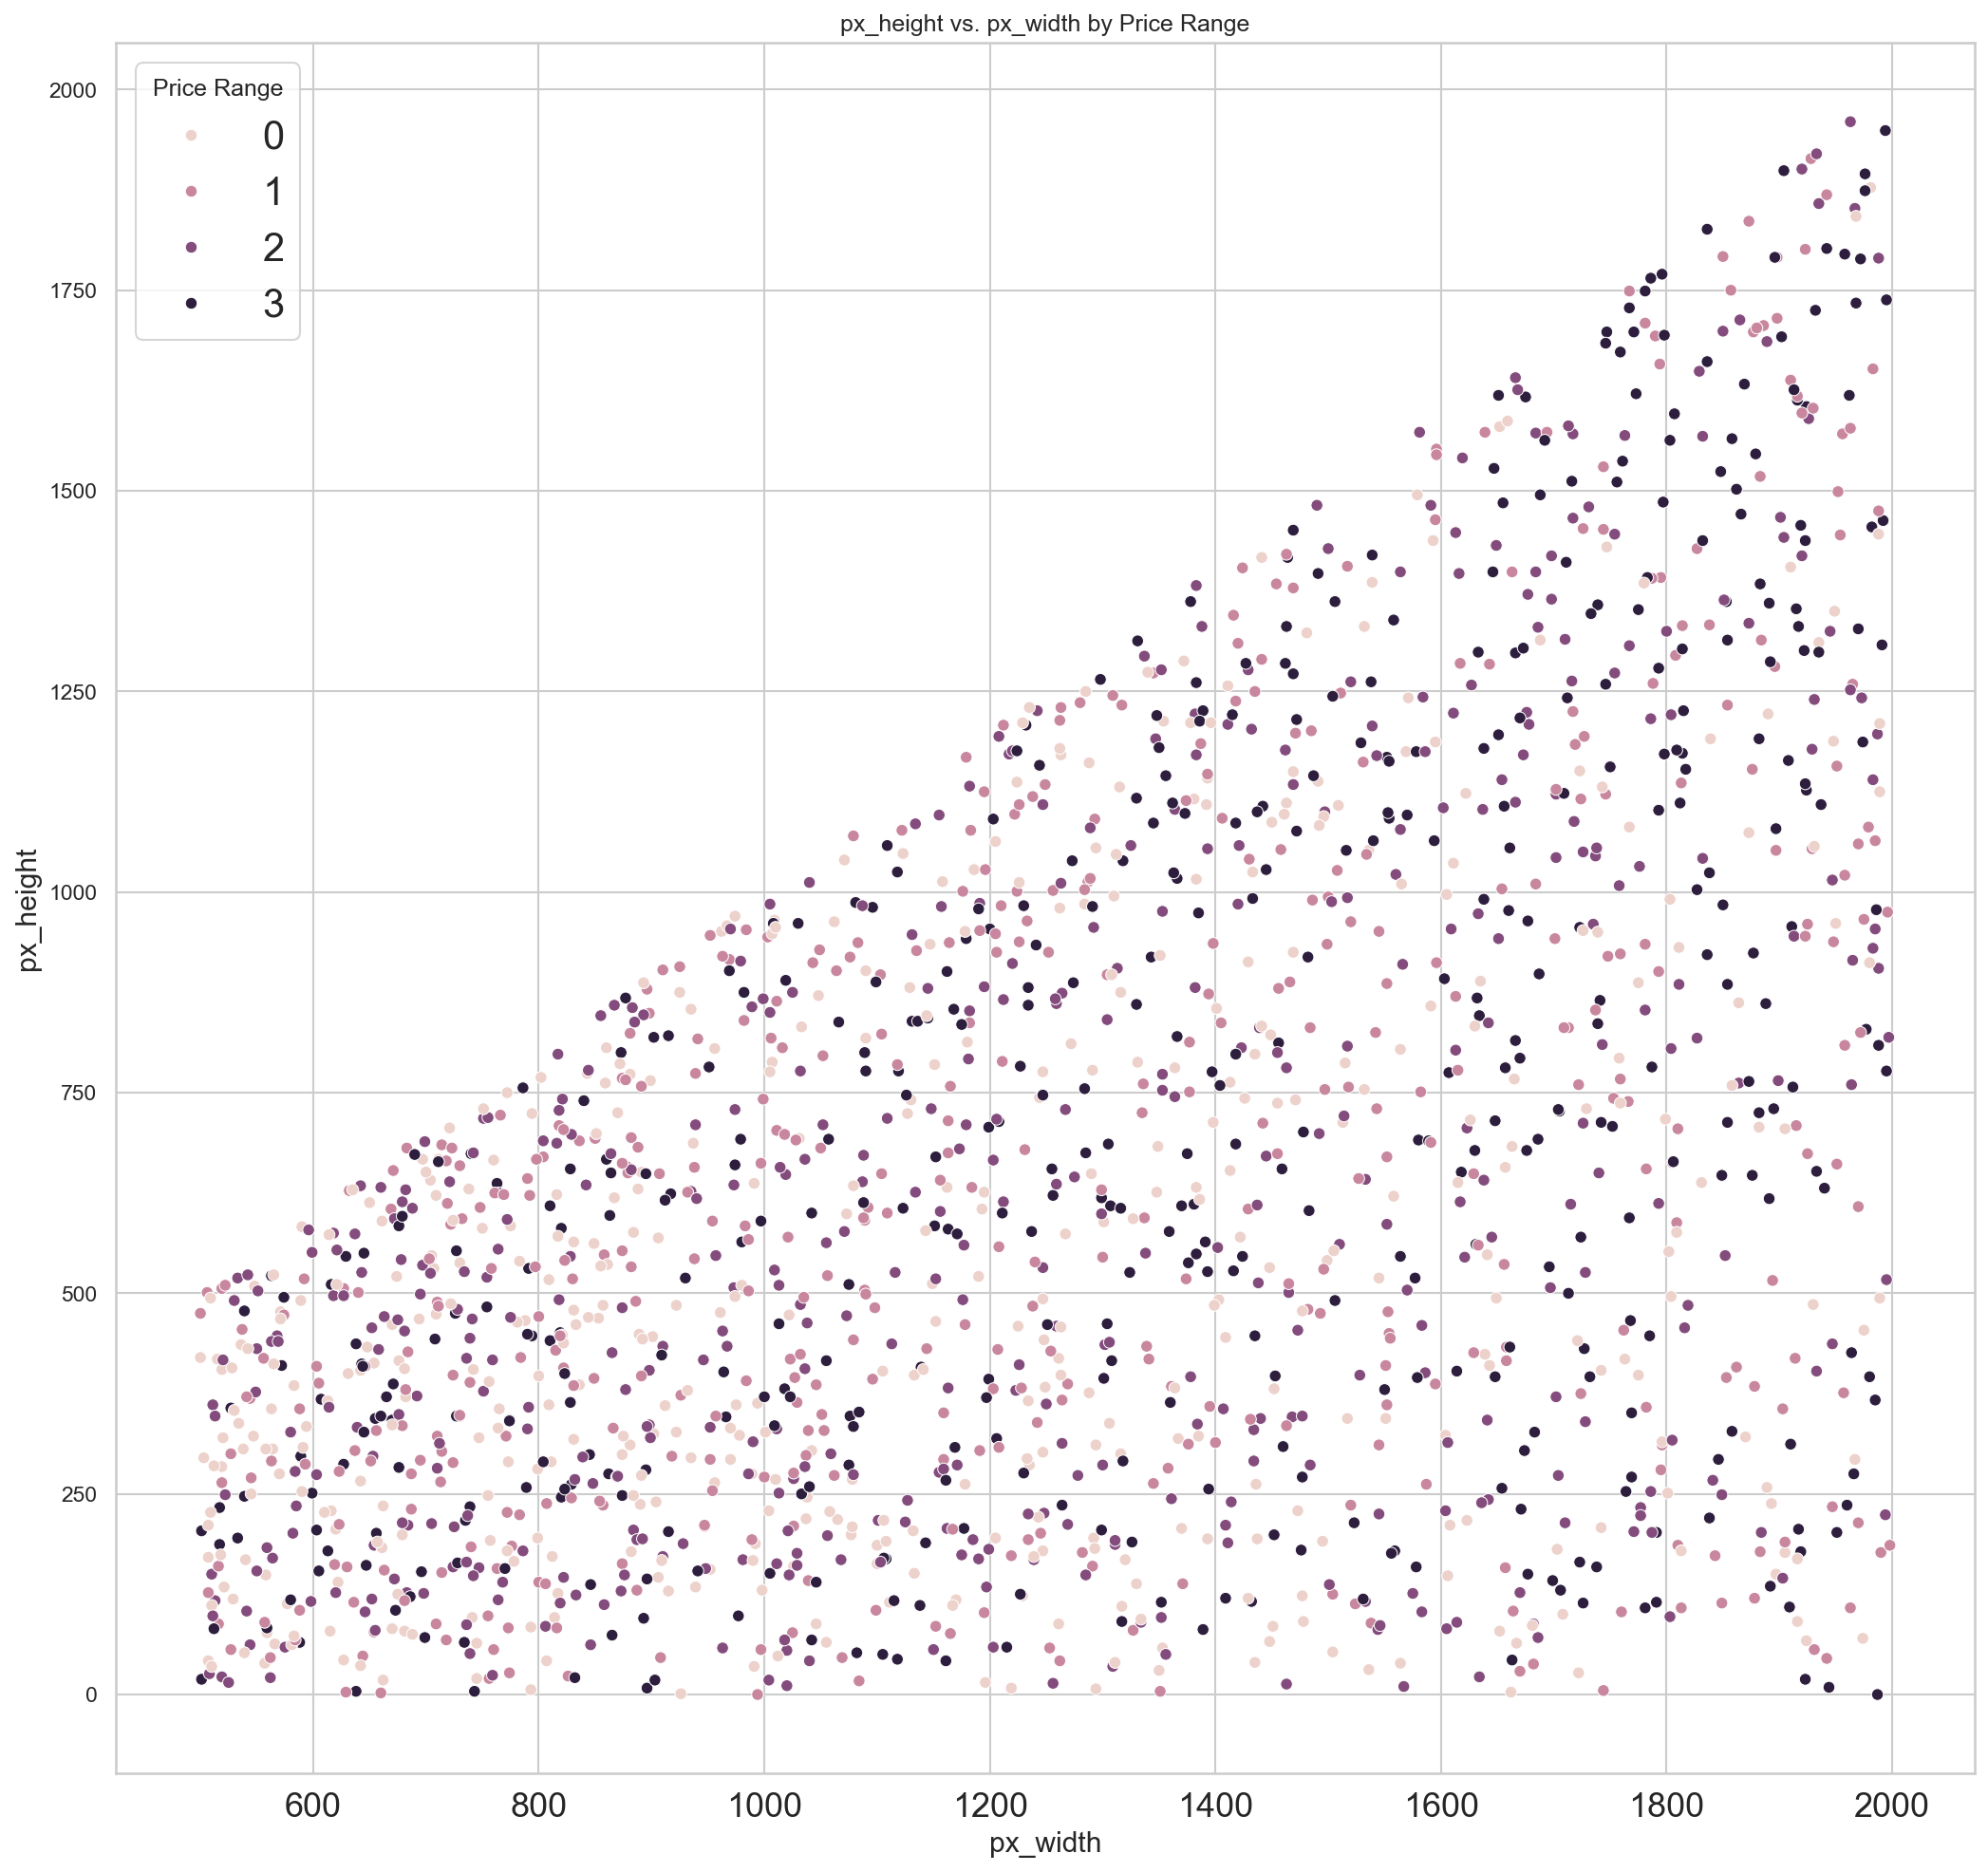

In [284]:
scatterplot('px_width' , 'px_height')

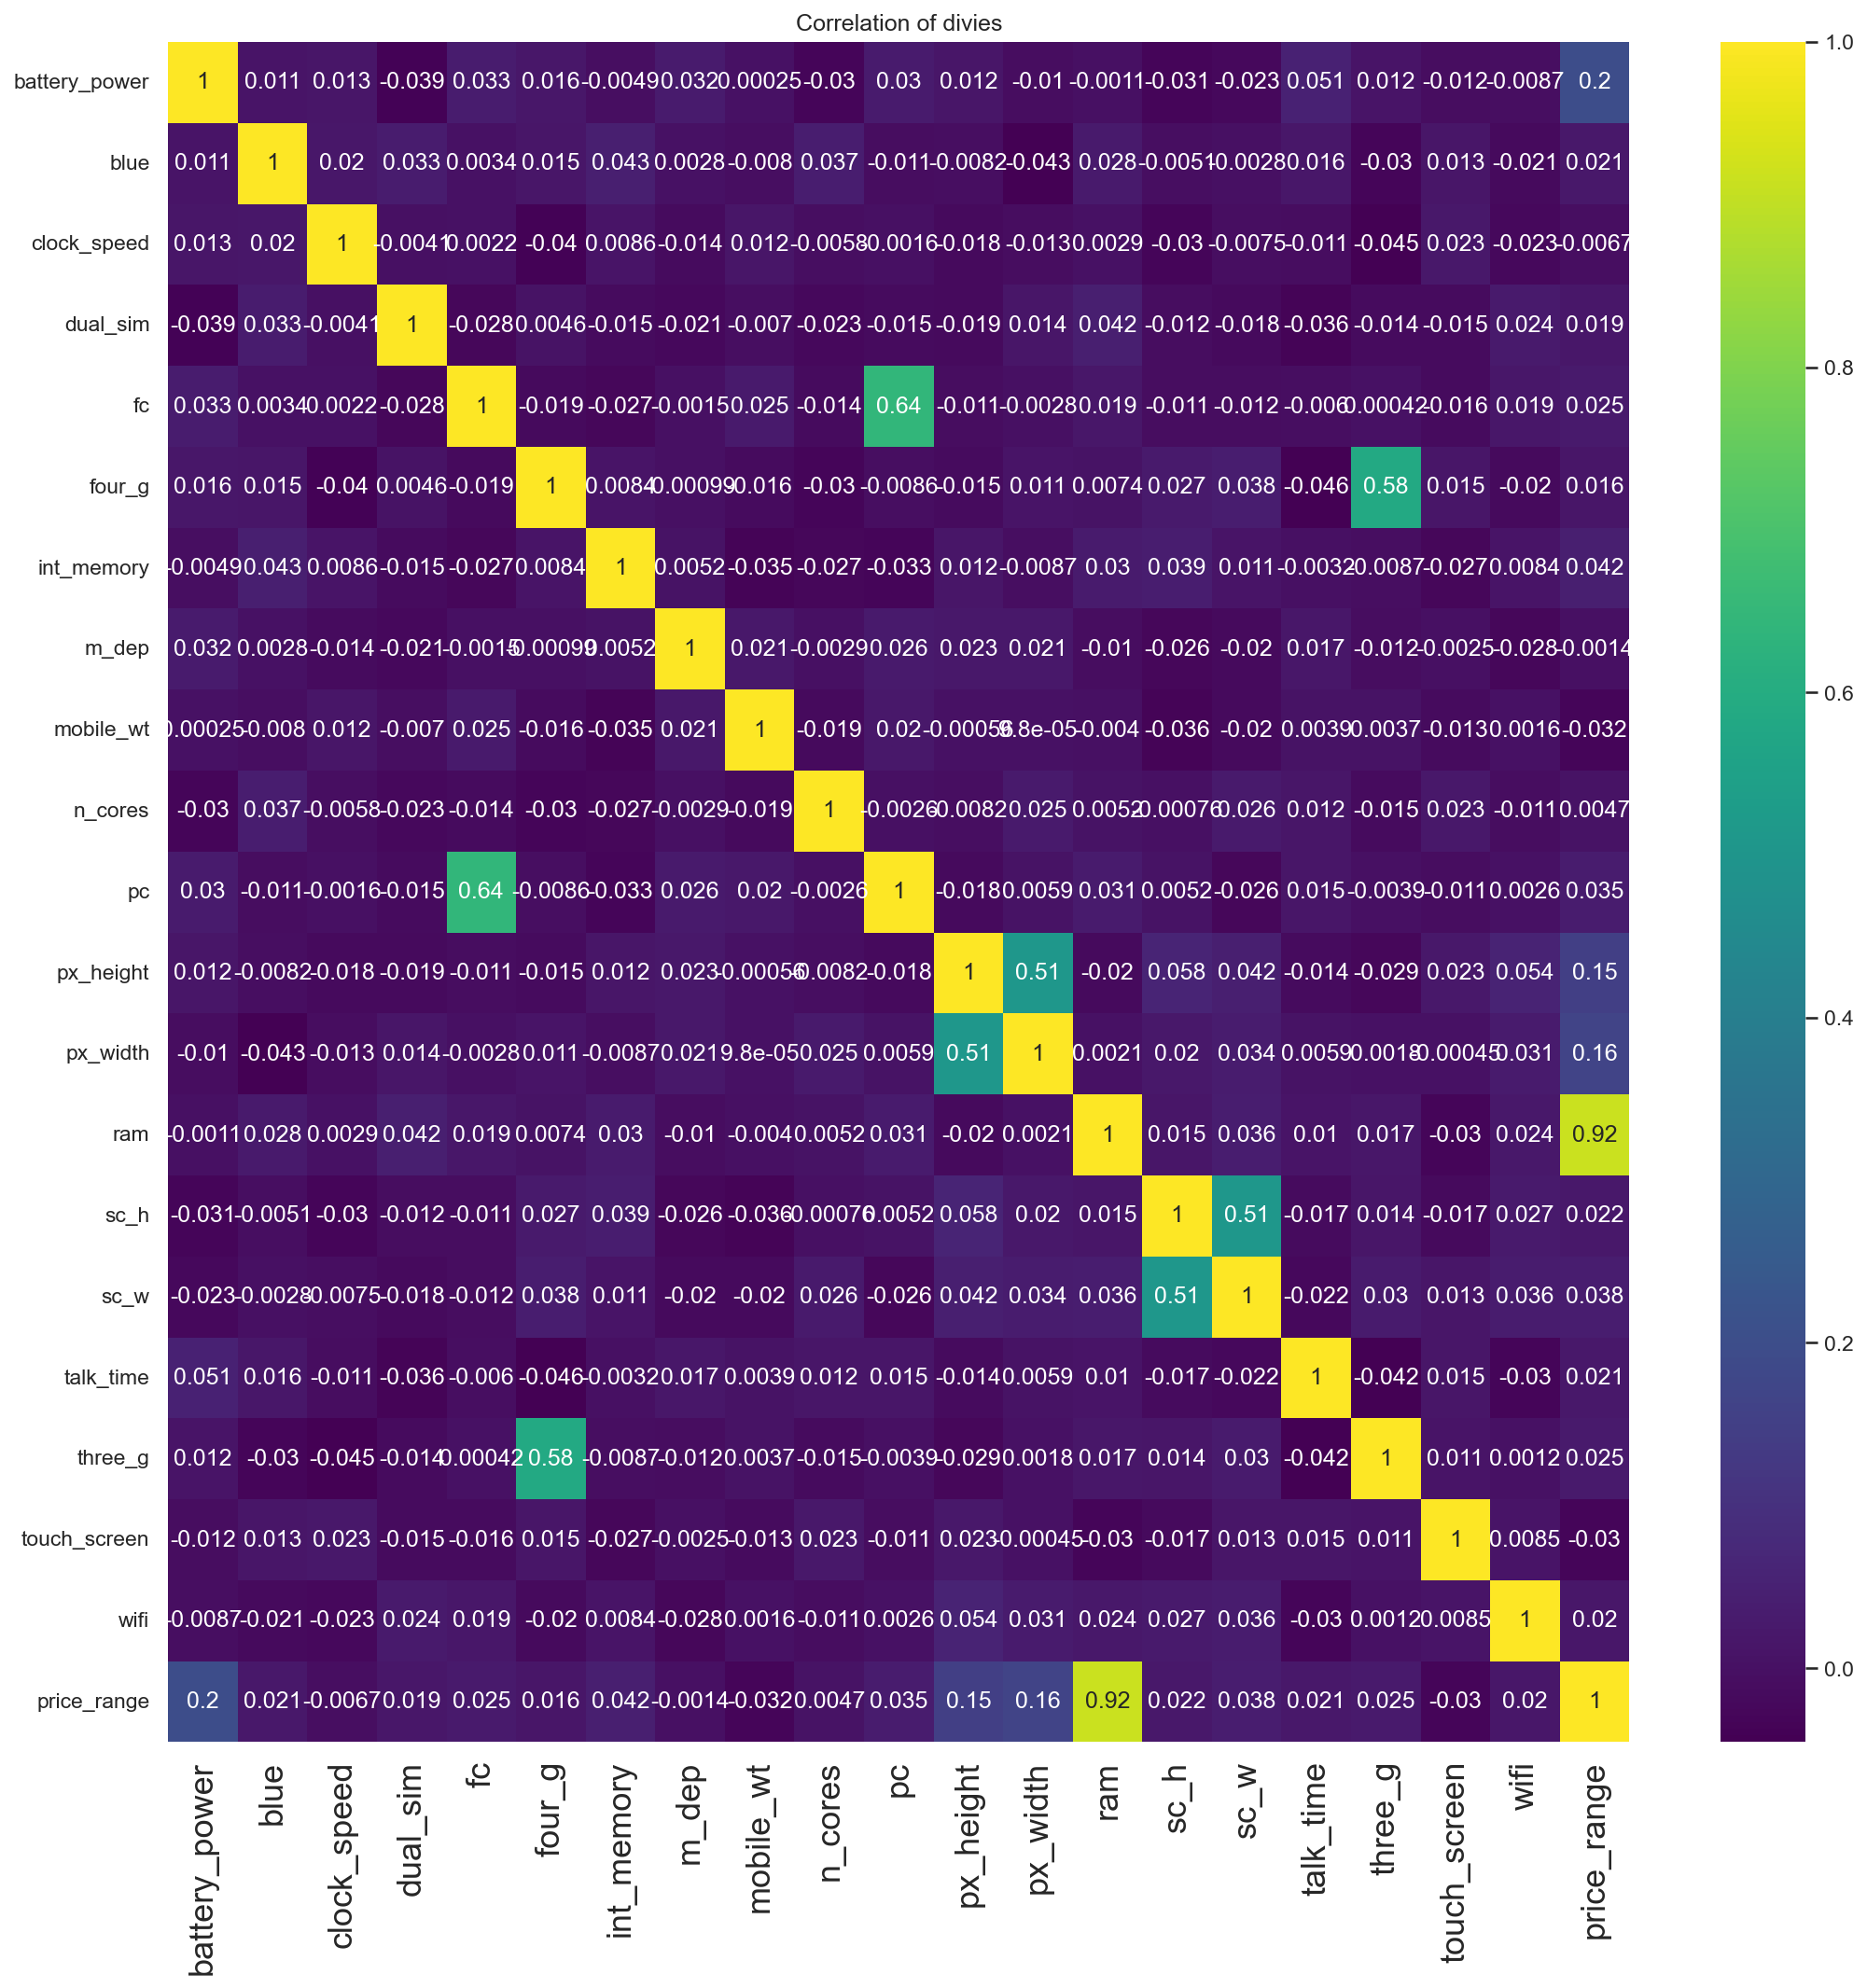

In [285]:
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title("Correlation of divies")
plt.show()

In [286]:
df.corr()['price_range'].sort_values(ascending=False)


price_range      1.000000
ram              0.917448
battery_power    0.199277
px_width         0.163319
px_height        0.147956
int_memory       0.041812
sc_w             0.038371
pc               0.034716
three_g          0.024896
fc               0.024738
sc_h             0.021643
blue             0.021330
talk_time        0.020511
wifi             0.019546
dual_sim         0.019108
four_g           0.015537
n_cores          0.004662
m_dep           -0.001396
clock_speed     -0.006675
touch_screen    -0.030315
mobile_wt       -0.032168
Name: price_range, dtype: float64

### Inferences:

Four_G and Three_G Relationship (0.58): There appears to be a moderate positive correlation between the presence of 4G and 3G capabilities in devices. 

Pixel Height and Pixel Width Relationship (0.51
-): The correlation coefficient of 0.51 indicates a moderate positive correlation between pixel height and pixel width. This suggests that devices with higher pixel height tend to also have higher pixel width, indicating a proportional increase in screen resolution. This correlation is expected as screen resolution is often specified in terms of both height and width#### .

Front Camera and Primary Camera Relationship (0.64): There is a strong positive correlation of 0.64 between the megapixels of front and primary cameras in device#### s. 

RAM and Price Relationship: The analysis indicat/es a strong positive correlation between RAM and device price. This implies that as the RAM capacity increases, the price of the device tends to increase as well. This observation aligns with consumer expectations, as devices with higher RAM capacities are often perceived as offering better performance and are positioned in higher price tiers.

These correlations provide valuable insights into the relationships between different features in the dataset, which can be leveraged for market analysis, product development, and pricing strategies.

In [287]:
mask = (
    (df['ram'] > 1700) & (df['price_range'] == 0) |
    (df['ram'] < 700) & (df['price_range'] == 1) |
    (df['ram'] > 2500) & (df['price_range'] == 1) |
    (df['ram'] < 2200) & (df['price_range'] == 2) |
    (df['ram'] > 3500) & (df['price_range'] == 2) |
    (df['ram'] < 2600) & (df['price_range'] == 3) |
    (df['px_height'] > 1500) & (df['price_range'] == 0) |
    (df['fc'] == 0) & (df['four_g'] == 1) & (df['price_range'] > 2) |
    (df['pc'] == 0) & (df['four_g'] == 1) & (df['price_range'] > 2) |
    (df['wifi'] == 0) & (df['four_g'] == 1) & (df['price_range'] > 2) |
    (df['px_height'] > 1850) |
    (df['fc'] > 16.5)
)

df = df[~mask]
print(df.shape)


(1633, 21)


In [288]:
df["fc"] = np.log10(df["fc"]+1)
df["sc_w"] = np.log10(df["sc_w"]+1)
df["px_height"] = np.log10(df["px_height"]+1)

In [289]:
df['screen_aspect_ratio'] = df['sc_h'] / df['sc_w']
df['resolution_aspect_ratio'] = df['px_height'] / df['px_width']

In [290]:
# The least effect on price.
# m_dep           -0.001396
# clock_speed     -0.006675
# touch_screen    -0.030315
# mobile_wt       -0.032168
list_of_drop = ['m_dep' , 'clock_speed' , 'touch_screen' , 'mobile_wt' , 'sc_h' , 'sc_w' , 'px_height' , 'px_width']
df = df.drop(list_of_drop , axis = 1 )

In [291]:
df.shape

(1633, 15)

In [292]:
df.replace([np.inf, -np.inf], inplace=True)

In [293]:
X = df.drop(['price_range'] , axis = 1)
y = df['price_range']

In [294]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [295]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [296]:
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))


rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

Logistic Regression Accuracy: 0.8960244648318043
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       103
           1       0.89      0.89      0.89        92
           2       0.81      0.93      0.86        68
           3       0.93      0.84      0.89        64

    accuracy                           0.90       327
   macro avg       0.89      0.89      0.89       327
weighted avg       0.90      0.90      0.90       327

Random Forest Accuracy: 0.8776758409785933
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       103
           1       0.89      0.80      0.85        92
           2       0.77      0.96      0.86        68
           3       0.96      0.83      0.89        64

    accuracy                           0.88       327
   macro avg       0.88      0.88      0.88       327
weighted av

#### Inferences:

1. **Logistic Regression:**
   - **Training:** The logistic regression model is trained with a maximum of 1000 iterations to ensure convergence.
   - **Evaluation:** The accuracy of the logistic regression model on the test set is approximately 89.6%. The classification report indicates high precision, recall, and f1-score across all price range classes.
   - **Insights:**
     - The model performs well in distinguishing between the different price ranges, with particularly high precision and recall for the lowest and highest price ranges (classes 0 and 3).
     - The relatively high accuracy and balanced performance across all classes suggest that logistic regression is a suitable baseline model for this classification task.

2. **Random Forest:**
   - **Training:** A random forest classifier is trained without specifying hyperparameters, using the default settings.
   - **Evaluation:** The accuracy of the random forest model is approximately 87.8%. The classification report shows slightly lower precision and recall compared to logistic regression, but the model still performs well.
   - **Insights:**
     - The model shows high recall for class 2, indicating that it is particularly good at identifying higher-priced mobiles. However, it has slightly lower precision, suggesting some misclassifications.
     - Random forests are robust and can capture complex relationships in the data, but further hyperparameter tuning might be needed to improve performance.

3. **XGBoost:**
   - **Training:** The XGBoost model is trained with default hyperparameters and evaluated using the 'mlogloss' metric.
   - **Evaluation:** The XGBoost model achieves the highest accuracy of approximately 90.8%. The classification report reveals excellent precision and recall across all classes, with the highest overall performance metrics.
   - **Insights:**
     - The XGBoost model outperforms both logistic regression and random forest in terms of accuracy and balanced class performance.
     - This indicates that XGBoost's ability to handle non-linear relationships and interactions between features makes it particularly effective for this dataset.

### Conclusions

- **Logistic Regression**: Serves as a strong baseline model with good overall performance.
- **Random Forest**: Provides robust performance and captures complex patterns but may benefit from hyperparameter tuning.
- **XGBoost**: Delivers the best performance, showcasing its strength in handling complex data structures and interactions.

Based on these evaluations, XGBoost is recommended for the task of predicting devices price ranges due to its superior accuracy and balanced performance across all classes.

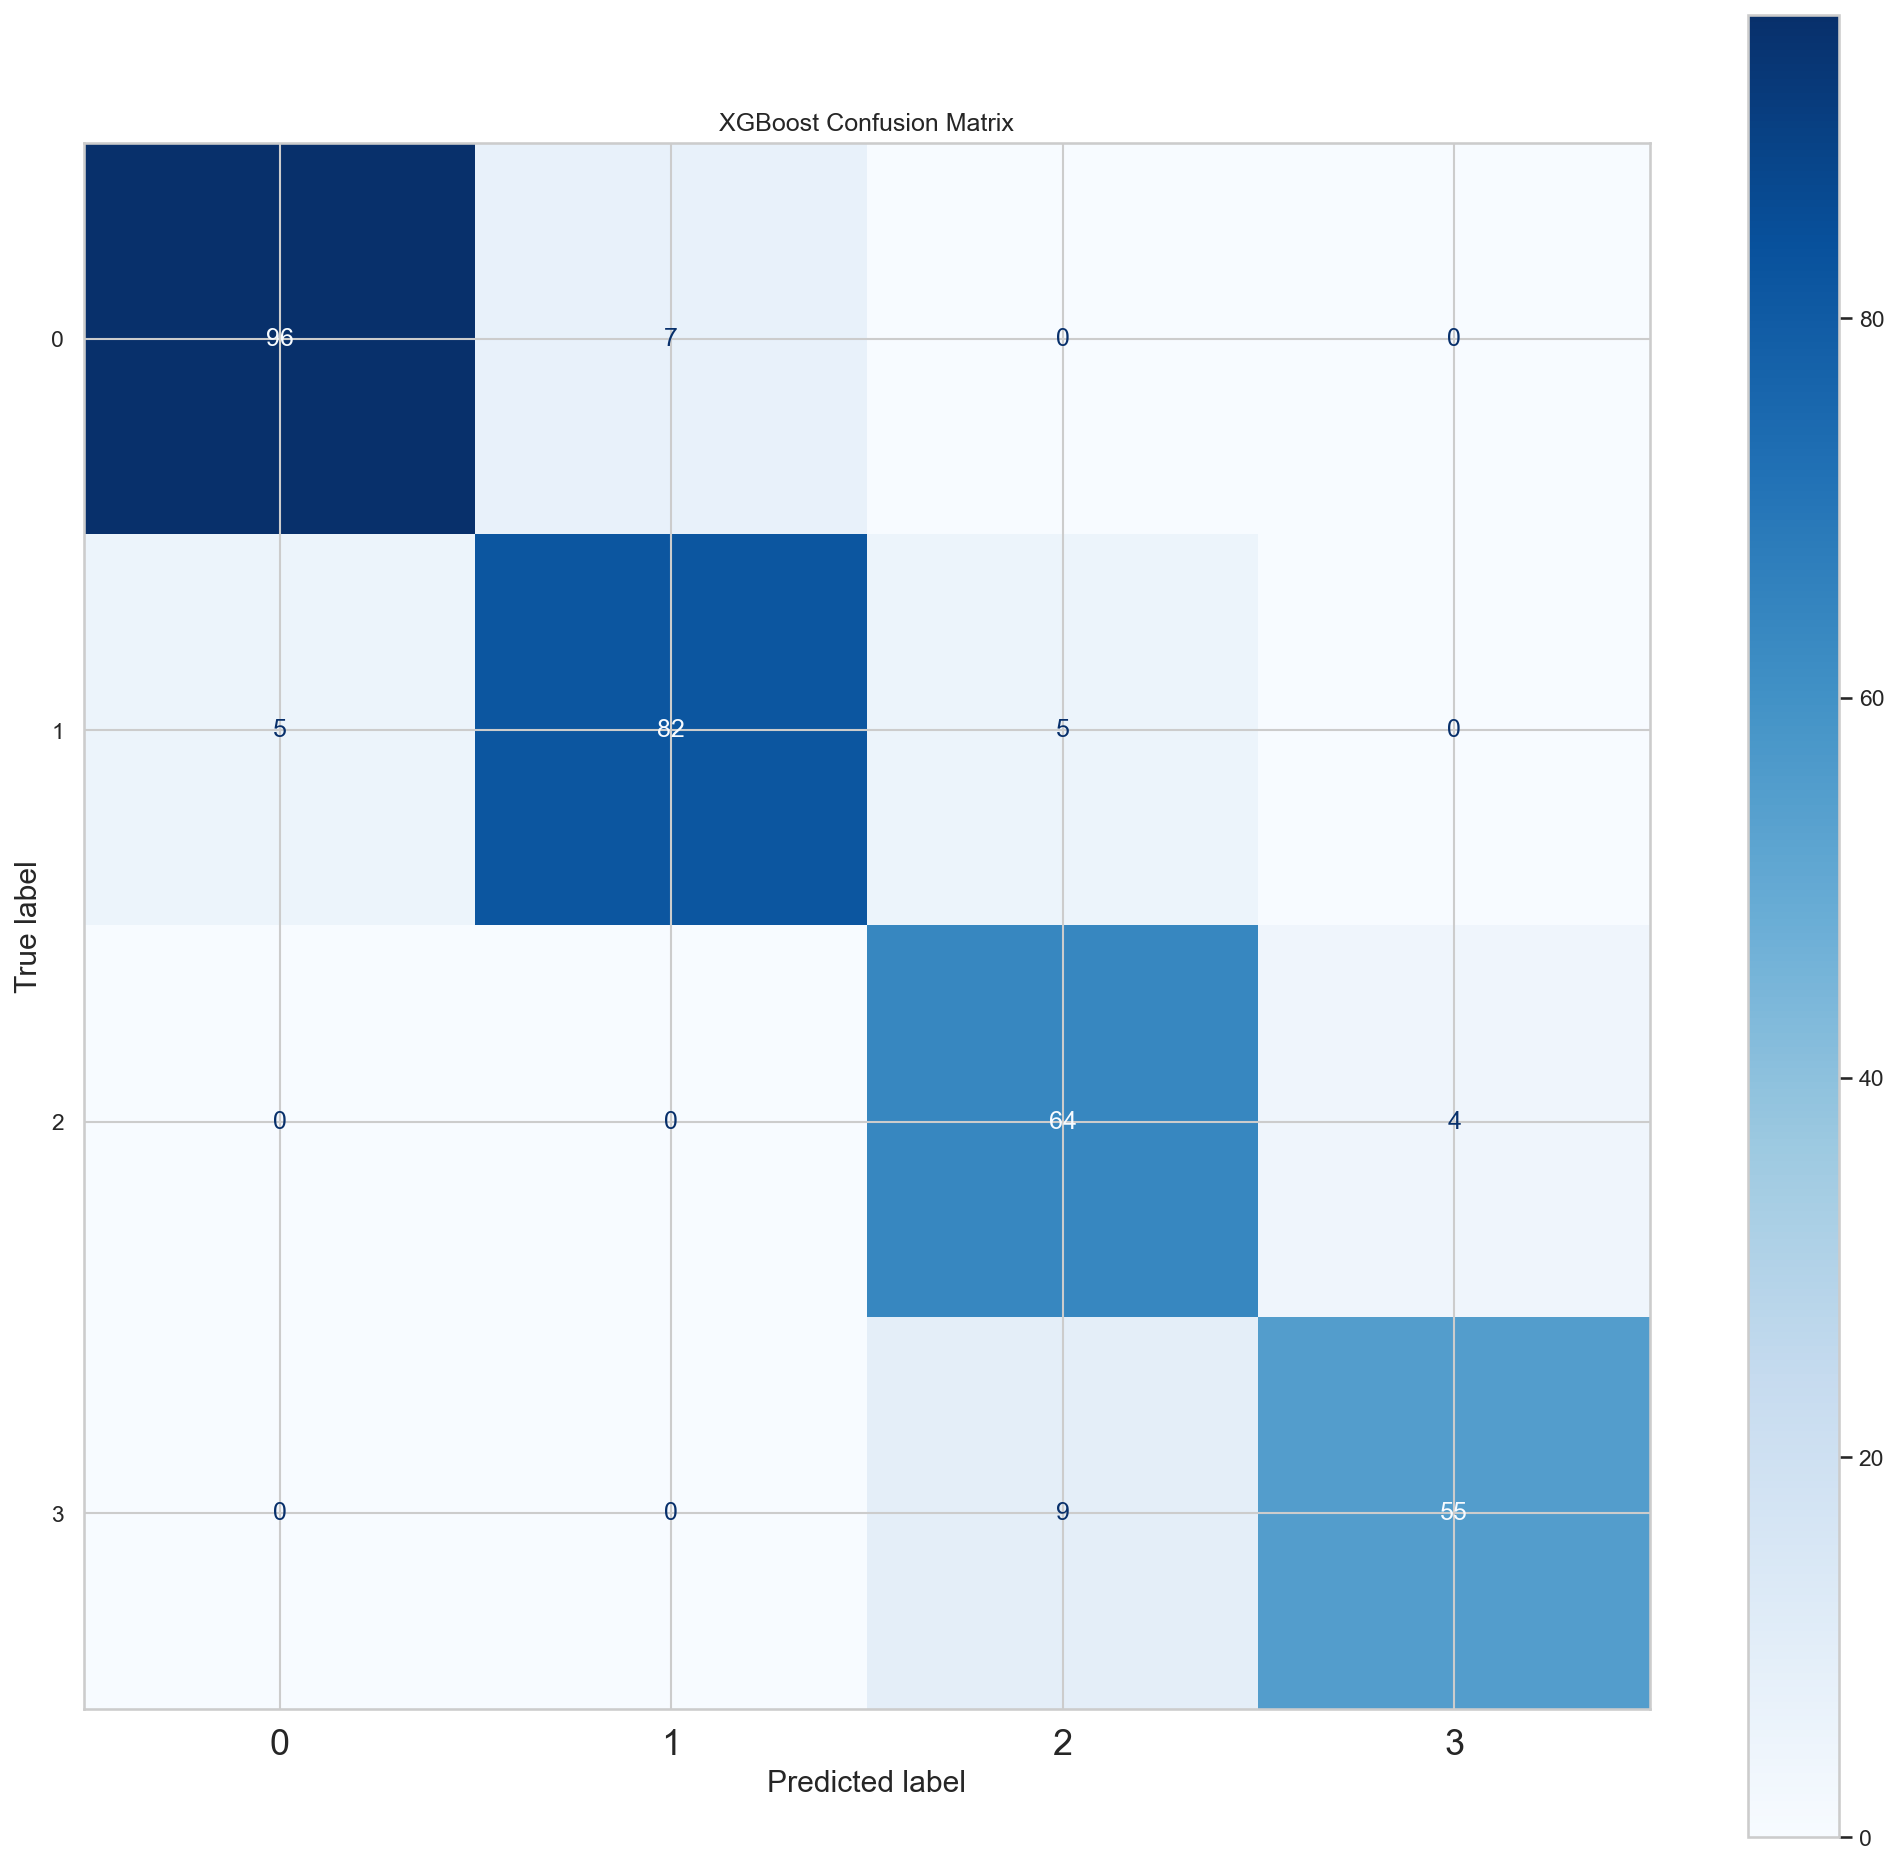

In [297]:
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost Confusion Matrix")

### Inferences

Based on the confusion matrix obtained from the XGBoost model, we can derive the following inferences:

1. **True Predictions**:
   - **Price Range 0**: The model correctly predicted 96 instances as price range 0.
   - **Price Range 1**: The model correctly predicted 82 instances as price range 1.
   - **Price Range 2**: The model correctly predicted 64 instances as price range 2.
   - **Price Range 3**: The model correctly predicted 55 instances as price r
ange 3.

2. **Misclassifications**:
   - The model predicted price range 1 instead of the correct price range 0 in 7 instances.
   - The model predicted price range 0 instead of the correct price range 1 in 5 instances.
   - The model predicted price range 2 instead of the correct price range 1 in 5 instances.
   - The model predicted price range 2 instead of the correct price range 3 in 9 instances.
   - The model predicted price range 3 instead of the correct price range 2 overall model performance.

In [298]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.3]
}

grid_search_xgb = GridSearchCV(estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
                               param_grid=param_grid_xgb, cv=3, n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train, y_train)
best_xgb = grid_search_xgb.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)
print("Best XGBoost Accuracy:", accuracy_score(y_test, y_pred_best_xgb))
print("Best XGBoost Classification Report:\n", classification_report(y_test, y_pred_best_xgb))

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best XGBoost Accuracy: 0.908256880733945
Best XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       103
           1       0.89      0.90      0.90        92
           2       0.85      0.93      0.89        68
           3       0.95      0.88      0.91        64

    accuracy                           0.91       327
   macro avg       0.91      0.91      0.91       327
weighted avg       0.91      0.91      0.91       327



### Inferences:

1. **Accuracy**: The optimized XGBoost model achieved an accuracy of 90.8%, which is an improvement over the previous results. This indicates that hyperparameter tuning has successfully enhanced the model's performance.

2. **Precision, Recall, F1-Score**: 
   - **Price Range 0**: High precision (0.94) and recall (0.92) indicate that the model is very effective at correctly identifying low-cost mobiles.
   - **Price Range 1**: Balanced performance with both precision and recall at 0.90, showing the model's reliability in identifying medium-cost mobiles.
   - **Price Range 2**: Improved recall (0.93) and f1-score (0.89) suggest better detection of high-cost mobiles.
   - **Price Range 3**: High precision (0.95) but slightly lower recall (0.88) indicates that while the model is good at identifying very high-cost mobiles, it sometimes misses them.

3. **Macro and Weighted Averages**:
   - **Macro Average**: Both precision, recall, and f1-score are consistently at 0.91, indicating the model's balanced performance across all classes.
   - **Weighted Average**: Similar to the macro average, the weighted metrics also highlight the model's overall effectiveness.
metrics also highlight the model's overall effectiveness.


In [299]:
df_test = pd.read_csv('test - test.csv')
df_test = df_test.head(10)

In [300]:
df_test['screen_aspect_ratio'] = df_test['sc_h'] / df_test['sc_w']
df_test['resolution_aspect_ratio'] = df_test['px_height'] / df_test['px_width']
list_of_drop = ['id' ,'m_dep' , 'clock_speed' , 'touch_screen' , 'mobile_wt' , 'sc_h' , 'sc_w' , 'px_height' , 'px_width']
df_test = df_test.drop(list_of_drop , axis = 1 )
df_test.replace([np.inf, -np.inf], inplace=True)
X_scaled = scaler.fit_transform(df_test)

final_predictions = best_xgb.predict(X_scaled)

In [301]:
final_predictions.shape

(10,)